# MODELO PREDICTIVO DE CONCENTRACIÓN DE NO2

Grupo ADAMA

Integrantes:
- Alejandro Álvarez Tenedor
- Daniela Echevarria García
- Miguel Ruiz Rivilla
- Antonio García Toro

Consideraciones iniciales:

Si se desea ejecutar el código a partir del dataset subido, por favor, comenzar en el punto 4. Los pasos previos se corresponden con la extracción de los datos de polución, meteorológicos y de tráfico y la posterior generación del dataset final.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Configurar pandas para que muestre más decimales en la salida
pd.set_option('display.precision', 10)

# 1. Análisis de los datasets

## 1.1. Densidad de tráfico

In [135]:
df_puntos_medida_trafico = pd.read_csv(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\info_datasets\puntos_medida\puntos_medida_densidad_trafico.csv', delimiter=';')

In [4]:
df_puntos_medida_trafico['distrito'].value_counts()

8.0     507
15.0    435
16.0    376
11.0    370
5.0     344
9.0     305
10.0    280
20.0    277
2.0     259
6.0     242
4.0     217
13.0    210
1.0     164
3.0     164
12.0    156
7.0     141
17.0    134
14.0    134
18.0     89
21.0     56
19.0     45
Name: distrito, dtype: int64

In [5]:
df = pd.read_csv(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\raw files\05-2023.csv', delimiter=';')

In [6]:
df.head(10)

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,1001,2023-05-01 00:00:00,C30,1152,2.0,0,59.0,N,5
1,1001,2023-05-01 00:15:00,C30,780,2.0,0,60.0,N,5
2,1001,2023-05-01 00:30:00,C30,732,2.0,0,63.0,N,5
3,1001,2023-05-01 00:45:00,C30,828,2.0,0,62.0,N,5
4,1001,2023-05-01 01:00:00,C30,612,2.0,0,60.0,N,5
5,1001,2023-05-01 01:15:00,C30,564,1.0,0,62.0,N,5
6,1001,2023-05-01 01:30:00,C30,408,1.0,0,58.0,N,5
7,1001,2023-05-01 01:45:00,C30,456,1.0,0,73.0,N,5
8,1001,2023-05-01 02:00:00,C30,192,1.0,0,35.0,N,5
9,1001,2023-05-01 02:15:00,C30,468,2.0,0,56.0,N,5


In [7]:
df.shape

(12926315, 9)

In [8]:
df['tipo_elem'].value_counts()

URB    11746030
M30      822862
C30      357423
Name: tipo_elem, dtype: int64

## 1.2. Datos meteorológicos

In [9]:
import os

def concat_csv_files(input_folder, output_file):
    # Eliminar el archivo de salida si ya existe
    if os.path.exists(output_file):
        os.remove(output_file)
        print(f"Archivo existente {output_file} eliminado.")

    # Lista para almacenar los DataFrames de cada archivo CSV
    dataframes = []

    # Iterar sobre los archivos en la carpeta
    for filename in os.listdir(input_folder):
        if filename.endswith(".csv"):
            file_path = os.path.join(input_folder, filename)
            # Leer el archivo CSV y añadir el DataFrame a la lista
            df = pd.read_csv(file_path)
            dataframes.append(df)
    
    # Concatenar todos los DataFrames
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Guardar el DataFrame combinado en el archivo de salida
    combined_df.to_csv(output_file, index=False)
    print(f"Todos los archivos CSV se han concatenado en {output_file}")


In [10]:
# Especificar la carpeta de entrada y el archivo de salida
input_folder = r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\datos_meteorologicos'
output_file = r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\datos_meteorologicos\full_meteo.csv'

# Ejecutar la función
concat_csv_files(input_folder, output_file)

Archivo existente C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\datos_meteorologicos\full_meteo.csv eliminado.
Todos los archivos CSV se han concatenado en C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\datos_meteorologicos\full_meteo.csv


In [11]:
df_meteo = pd.read_csv(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\datos_meteorologicos\full_meteo.csv', delimiter=';')

In [12]:
df_meteo.head(10)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,H04,V04,H05,V05,H06,V06,H07,V07,H08,V08,H09,V09,H10,V10,H11,V11,H12,V12,H13,V13,H14,V14,H15,V15,H16,V16,H17,V17,H18,V18,H19,V19,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2019,1,1,0.65,V,0.95,V,0.87,V,0.73,V,0.57,V,0.57,V,0.80,V,0.85,V,0.90,V,0.73,V,0.85,V,1.02,V,0.62,V,0.45,V,0.77,V,0.35,V,0.98,V,0.47,V,0.37,V,0.43,V,0.58,V,0.38,V,0.67,V,0.18,V
1,28,79,102,81,28079102_81_98,2019,1,2,0.50,V,0.95,V,0.60,V,0.73,V,1.62,V,1.42,V,0.48,V,2.42,V,0.75,V,1.35,V,1.40,V,0.98,V,0.83,V,0.47,V,0.52,V,0.50,V,0.57,V,0.80,V,0.88,V,0.53,V,1.13,V,2.02,V,3.48,V,2.82,V
2,28,79,102,81,28079102_81_98,2019,1,3,2.22,V,2.53,V,2.20,V,2.43,V,1.90,V,2.18,V,2.13,V,2.17,V,1.12,V,1.23,V,1.02,V,0.93,V,1.23,V,1.33,V,0.82,V,1.12,V,0.77,V,0.43,V,0.25,V,0.50,V,2.02,V,1.33,V,0.83,V,0.67,V
3,28,79,102,81,28079102_81_98,2019,1,4,0.87,V,0.77,V,0.87,V,0.92,V,0.65,V,0.47,V,0.70,V,0.23,V,0.50,V,0.78,V,1.03,V,0.87,V,0.45,V,0.50,V,0.48,V,0.28,V,0.68,V,0.47,V,0.40,V,0.13,V,0.58,V,0.92,V,0.20,V,0.33,V
4,28,79,102,81,28079102_81_98,2019,1,5,0.57,V,1.82,V,1.65,V,0.55,V,0.58,V,0.60,V,0.68,V,0.42,V,0.52,V,0.23,V,0.42,V,0.92,V,0.28,V,0.63,V,0.68,V,0.87,V,0.60,V,0.45,V,0.60,V,0.47,V,0.32,V,0.30,V,0.23,V,0.45,V
5,28,79,102,81,28079102_81_98,2019,1,6,1.08,V,1.33,V,1.08,V,0.80,V,0.48,V,0.55,V,0.57,V,1.52,V,1.35,V,0.42,V,0.40,V,0.60,V,0.65,V,0.80,V,0.68,V,1.13,V,0.92,V,0.63,V,1.15,V,1.60,V,1.55,V,1.60,V,2.55,V,3.18,V
6,28,79,102,81,28079102_81_98,2019,1,7,1.88,V,1.55,V,1.13,V,1.28,V,1.27,V,0.62,V,0.20,V,0.23,V,0.78,V,0.33,V,0.23,V,0.82,V,0.25,V,1.25,V,1.07,V,0.87,V,0.75,V,1.23,V,1.25,V,1.37,V,1.67,V,1.30,V,1.95,V,1.98,V
7,28,79,102,81,28079102_81_98,2019,1,8,1.28,V,1.22,V,0.78,V,1.10,V,1.47,V,1.37,V,0.53,V,0.70,V,0.40,V,0.73,V,0.52,V,0.83,V,0.78,V,0.77,V,0.47,V,0.65,V,1.00,V,1.05,V,0.95,V,0.97,V,1.07,V,0.82,V,1.37,V,0.77,V
8,28,79,102,81,28079102_81_98,2019,1,9,1.17,V,0.67,V,1.30,V,1.18,V,0.35,V,1.42,V,2.57,V,1.07,V,0.68,V,1.75,V,1.98,V,1.10,V,0.83,V,1.18,V,1.40,V,2.87,V,3.27,V,3.48,V,2.55,V,1.57,V,1.80,V,1.58,V,2.68,V,2.45,V
9,28,79,102,81,28079102_81_98,2019,1,10,1.67,V,2.28,V,1.22,V,0.83,V,0.73,V,0.20,V,0.27,V,1.82,V,2.00,V,2.00,V,2.98,V,3.45,V,2.93,V,3.02,V,3.30,V,3.10,V,2.32,V,2.55,V,2.33,V,3.07,V,3.07,V,3.20,V,2.27,V,2.35,V


In [13]:
df_meteo['ESTACION'].value_counts()

24     13624
59     13459
102    12495
103    12467
107    12429
54     11822
108    11788
106    11690
56     11591
39      4700
104     3969
58      3890
36      3874
38      3866
8       3860
35      3760
113     3506
115     3420
112     3352
110     3306
109     3184
114     3156
16      2565
111     2450
18      1947
4       1695
Name: ESTACION, dtype: int64

## 1.3. Calidad del aire

In [14]:
df_polucion = pd.read_csv(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\calidad_aire\datos_calidad_aire.csv', delimiter=';')

In [15]:
df_polucion.head(10)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,H04,V04,H05,V05,H06,V06,H07,V07,H08,V08,H09,V09,H10,V10,H11,V11,H12,V12,H13,V13,H14,V14,H15,V15,H16,V16,H17,V17,H18,V18,H19,V19,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2019,4,1,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V,5.0,V,5.0,V,4.0,V,4.0,V,4.0,V,4.0,V,3.0,V,2.0,V,2.0,V,1.0,V,2.0,V,2.0,V,2.0,V,4.0,V,4.0,V,4.0,V
1,28,79,4,1,28079004_1_38,2019,4,2,3.0,V,3.0,V,4.0,V,4.0,V,3.0,V,4.0,V,4.0,V,6.0,V,9.0,V,6.0,V,6.0,V,5.0,V,4.0,V,3.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,3.0,V,4.0,V,4.0,V,4.0,V,4.0,V
2,28,79,4,1,28079004_1_38,2019,4,3,3.0,V,3.0,V,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V,5.0,V,6.0,V,6.0,V,5.0,V,5.0,V,3.0,V,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V,6.0,V,5.0,V,5.0,V,5.0,V,4.0,V
3,28,79,4,1,28079004_1_38,2019,4,4,4.0,V,3.0,V,3.0,V,3.0,V,3.0,V,2.0,V,2.0,V,4.0,V,3.0,V,3.0,V,2.0,V,3.0,V,4.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,3.0,V,3.0,V,4.0,V,4.0,V,3.0,V,4.0,V
4,28,79,4,1,28079004_1_38,2019,4,5,4.0,V,4.0,V,3.0,V,3.0,V,2.0,V,2.0,V,2.0,V,1.0,V,2.0,V,2.0,V,2.0,V,1.0,V,1.0,V,1.0,V,2.0,V,2.0,V,2.0,V,3.0,V,3.0,V,2.0,V,2.0,V,2.0,V,1.0,V,1.0,V
5,28,79,4,1,28079004_1_38,2019,4,6,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,2.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,2.0,V,1.0,V
6,28,79,4,1,28079004_1_38,2019,4,7,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V,2.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,3.0,V,4.0,V,4.0,V,3.0,V,3.0,V
7,28,79,4,1,28079004_1_38,2019,4,8,3.0,V,3.0,V,3.0,V,2.0,V,2.0,V,2.0,V,2.0,V,3.0,V,2.0,V,2.0,V,3.0,V,3.0,V,4.0,V,2.0,V,3.0,V,2.0,V,2.0,V,1.0,V,2.0,V,2.0,V,4.0,V,4.0,V,3.0,V,3.0,V
8,28,79,4,1,28079004_1_38,2019,4,9,3.0,V,3.0,V,3.0,V,2.0,V,2.0,V,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V,2.0,V,2.0,V,3.0,V,3.0,V,3.0,V,3.0,V,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V,3.0,V
9,28,79,4,1,28079004_1_38,2019,4,10,3.0,V,2.0,V,2.0,V,2.0,V,2.0,V,2.0,V,1.0,V,1.0,V,2.0,V,2.0,V,3.0,V,4.0,V,4.0,V,4.0,V,4.0,V,3.0,V,4.0,V,4.0,V,5.0,V,4.0,V,4.0,V,5.0,V,5.0,V,5.0,V


In [16]:
df_polucion['ESTACION'].value_counts()

8     23297
24    20754
18    17446
38    16159
55    15750
56    12103
11    11334
35    11278
57    10515
36    10413
50     9727
60     9717
48     9695
47     9670
4      8538
17     8523
39     8506
40     8505
16     8119
49     7788
54     7788
27     7788
58     7788
59     7724
Name: ESTACION, dtype: int64

# 2. Generación dataset

## 2.1 Datos meteorológicos

Vamos a seleccionar el punto de Plaza Elíptica en el cual se disponen del mayor número de medidas tanto a nivel de polución como meteorológicos.

In [17]:
df_meteo.head(10)

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,H02,V02,H03,V03,H04,V04,H05,V05,H06,V06,H07,V07,H08,V08,H09,V09,H10,V10,H11,V11,H12,V12,H13,V13,H14,V14,H15,V15,H16,V16,H17,V17,H18,V18,H19,V19,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2019,1,1,0.65,V,0.95,V,0.87,V,0.73,V,0.57,V,0.57,V,0.80,V,0.85,V,0.90,V,0.73,V,0.85,V,1.02,V,0.62,V,0.45,V,0.77,V,0.35,V,0.98,V,0.47,V,0.37,V,0.43,V,0.58,V,0.38,V,0.67,V,0.18,V
1,28,79,102,81,28079102_81_98,2019,1,2,0.50,V,0.95,V,0.60,V,0.73,V,1.62,V,1.42,V,0.48,V,2.42,V,0.75,V,1.35,V,1.40,V,0.98,V,0.83,V,0.47,V,0.52,V,0.50,V,0.57,V,0.80,V,0.88,V,0.53,V,1.13,V,2.02,V,3.48,V,2.82,V
2,28,79,102,81,28079102_81_98,2019,1,3,2.22,V,2.53,V,2.20,V,2.43,V,1.90,V,2.18,V,2.13,V,2.17,V,1.12,V,1.23,V,1.02,V,0.93,V,1.23,V,1.33,V,0.82,V,1.12,V,0.77,V,0.43,V,0.25,V,0.50,V,2.02,V,1.33,V,0.83,V,0.67,V
3,28,79,102,81,28079102_81_98,2019,1,4,0.87,V,0.77,V,0.87,V,0.92,V,0.65,V,0.47,V,0.70,V,0.23,V,0.50,V,0.78,V,1.03,V,0.87,V,0.45,V,0.50,V,0.48,V,0.28,V,0.68,V,0.47,V,0.40,V,0.13,V,0.58,V,0.92,V,0.20,V,0.33,V
4,28,79,102,81,28079102_81_98,2019,1,5,0.57,V,1.82,V,1.65,V,0.55,V,0.58,V,0.60,V,0.68,V,0.42,V,0.52,V,0.23,V,0.42,V,0.92,V,0.28,V,0.63,V,0.68,V,0.87,V,0.60,V,0.45,V,0.60,V,0.47,V,0.32,V,0.30,V,0.23,V,0.45,V
5,28,79,102,81,28079102_81_98,2019,1,6,1.08,V,1.33,V,1.08,V,0.80,V,0.48,V,0.55,V,0.57,V,1.52,V,1.35,V,0.42,V,0.40,V,0.60,V,0.65,V,0.80,V,0.68,V,1.13,V,0.92,V,0.63,V,1.15,V,1.60,V,1.55,V,1.60,V,2.55,V,3.18,V
6,28,79,102,81,28079102_81_98,2019,1,7,1.88,V,1.55,V,1.13,V,1.28,V,1.27,V,0.62,V,0.20,V,0.23,V,0.78,V,0.33,V,0.23,V,0.82,V,0.25,V,1.25,V,1.07,V,0.87,V,0.75,V,1.23,V,1.25,V,1.37,V,1.67,V,1.30,V,1.95,V,1.98,V
7,28,79,102,81,28079102_81_98,2019,1,8,1.28,V,1.22,V,0.78,V,1.10,V,1.47,V,1.37,V,0.53,V,0.70,V,0.40,V,0.73,V,0.52,V,0.83,V,0.78,V,0.77,V,0.47,V,0.65,V,1.00,V,1.05,V,0.95,V,0.97,V,1.07,V,0.82,V,1.37,V,0.77,V
8,28,79,102,81,28079102_81_98,2019,1,9,1.17,V,0.67,V,1.30,V,1.18,V,0.35,V,1.42,V,2.57,V,1.07,V,0.68,V,1.75,V,1.98,V,1.10,V,0.83,V,1.18,V,1.40,V,2.87,V,3.27,V,3.48,V,2.55,V,1.57,V,1.80,V,1.58,V,2.68,V,2.45,V
9,28,79,102,81,28079102_81_98,2019,1,10,1.67,V,2.28,V,1.22,V,0.83,V,0.73,V,0.20,V,0.27,V,1.82,V,2.00,V,2.00,V,2.98,V,3.45,V,2.93,V,3.02,V,3.30,V,3.10,V,2.32,V,2.55,V,2.33,V,3.07,V,3.07,V,3.20,V,2.27,V,2.35,V


Filtramos

In [18]:
df_meteo_filtered = df_meteo[df_meteo['ESTACION'] == 56]

Generamos una fila por cada hora del día (quitamos expansion de 24 columnas)

In [19]:
import pandas as pd
from datetime import datetime, timedelta

# Función para transformar cada fila en 24 filas
def transformar_fila(fila):
    filas_transformadas = []
    base_datetime = datetime(fila['ANO'], fila['MES'], fila['DIA'])
    for hora in range(1, 25):
        datetime_col = base_datetime + timedelta(hours=hora-1)
        medida_col = f'H{hora:02d}'
        validacion_col = f'V{hora:02d}'
        medida = fila[medida_col]
        validacion = fila[validacion_col]
        nueva_fila = {
            'PROVINCIA': fila['PROVINCIA'],
            'MUNICIPIO': fila['MUNICIPIO'],
            'ESTACION': fila['ESTACION'],
            'MAGNITUD': fila['MAGNITUD'],
            'datetime': datetime_col,
            'medida': medida,
            'validacion': validacion
        }
        filas_transformadas.append(nueva_fila)
    return filas_transformadas

In [20]:
# Aplicar la transformación a cada fila del DataFrame original
filas_transformadas = []
for _, fila in df_meteo_filtered.iterrows():
    filas_transformadas.extend(transformar_fila(fila))

# Crear un nuevo DataFrame con las filas transformadas
df_meteo_transformed = pd.DataFrame(filas_transformadas)

In [21]:
df_meteo_transformed[df_meteo_transformed['datetime'] == '2019-01-01 00:00:00']

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,datetime,medida,validacion
0,28,79,56,81,2019-01-01,0.68,V
744,28,79,56,82,2019-01-01,48.00,V
1488,28,79,56,83,2019-01-01,2.60,V
2232,28,79,56,86,2019-01-01,71.00,V
2976,28,79,56,87,2019-01-01,959.00,V
3720,28,79,56,89,2019-01-01,0.00,V


Eliminamos aquellos datos con medidas erróneas

In [22]:
df_meteo_transformed[df_meteo_transformed['validacion']!='V'].shape

(2144, 7)

In [23]:
df_meteo_transformed.shape

(278184, 7)

In [24]:
df_meteo_transformed = df_meteo_transformed[df_meteo_transformed['validacion']=='V']

In [25]:
df_meteo_transformed.shape

(276040, 7)

Convertimos de nuevo el dataframe para que tenga una única fila por cada hora y en una columna por cada medida.

In [26]:
# Pivotar el DataFrame
df_meteo_final = df_meteo_transformed.pivot_table(
    index=['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'datetime'],
    columns='MAGNITUD',
    values='medida',
    aggfunc='first'
).reset_index()

In [27]:
df_meteo_final[df_meteo_final['datetime'] == '2019-01-01 00:00:00']

MAGNITUD,PROVINCIA,MUNICIPIO,ESTACION,datetime,81,82,83,86,87,89
0,28,79,56,2019-01-01,0.68,48.0,2.6,71.0,959.0,0.0


In [28]:
df_meteo_final.head(10)

MAGNITUD,PROVINCIA,MUNICIPIO,ESTACION,datetime,81,82,83,86,87,89
0,28,79,56,2019-01-01 00:00:00,0.68,48.0,2.6,71.0,959.0,0.0
1,28,79,56,2019-01-01 01:00:00,0.69,32.0,2.5,71.0,959.0,0.0
2,28,79,56,2019-01-01 02:00:00,0.70,43.0,1.7,74.0,959.0,0.0
3,28,79,56,2019-01-01 03:00:00,0.70,74.0,1.1,75.0,959.0,0.0
4,28,79,56,2019-01-01 04:00:00,0.66,67.0,1.2,74.0,959.0,0.0
5,28,79,56,2019-01-01 05:00:00,0.67,31.0,0.2,78.0,959.0,0.0
6,28,79,56,2019-01-01 06:00:00,0.79,67.0,-0.3,80.0,959.0,0.0
7,28,79,56,2019-01-01 07:00:00,0.77,62.0,-0.3,79.0,959.0,0.0
8,28,79,56,2019-01-01 08:00:00,0.85,78.0,-1.0,81.0,960.0,0.0
9,28,79,56,2019-01-01 09:00:00,0.71,82.0,-0.3,77.0,960.0,0.0


Renombramos las columnas

In [29]:
df_meteo_final = df_meteo_final.rename(columns={81:'vel_viento', 82: 'dir_viento', 83:'temperatura', 86: 'humedad_relativa', 87:'presion_barometrica', 89:'precipitacion'})

In [30]:
df_meteo_final.head(10)

MAGNITUD,PROVINCIA,MUNICIPIO,ESTACION,datetime,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion
0,28,79,56,2019-01-01 00:00:00,0.68,48.0,2.6,71.0,959.0,0.0
1,28,79,56,2019-01-01 01:00:00,0.69,32.0,2.5,71.0,959.0,0.0
2,28,79,56,2019-01-01 02:00:00,0.70,43.0,1.7,74.0,959.0,0.0
3,28,79,56,2019-01-01 03:00:00,0.70,74.0,1.1,75.0,959.0,0.0
4,28,79,56,2019-01-01 04:00:00,0.66,67.0,1.2,74.0,959.0,0.0
5,28,79,56,2019-01-01 05:00:00,0.67,31.0,0.2,78.0,959.0,0.0
6,28,79,56,2019-01-01 06:00:00,0.79,67.0,-0.3,80.0,959.0,0.0
7,28,79,56,2019-01-01 07:00:00,0.77,62.0,-0.3,79.0,959.0,0.0
8,28,79,56,2019-01-01 08:00:00,0.85,78.0,-1.0,81.0,960.0,0.0
9,28,79,56,2019-01-01 09:00:00,0.71,82.0,-0.3,77.0,960.0,0.0


## 3.2 Datos polución

In [31]:
df_polucion_filtered = df_polucion[df_polucion['ESTACION'] == 56]

In [32]:
# Aplicar la transformación a cada fila del DataFrame original
filas_transformadas = []
for _, fila in df_polucion_filtered.iterrows():
    filas_transformadas.extend(transformar_fila(fila))

# Crear un nuevo DataFrame con las filas transformadas
df_polucion_transformed = pd.DataFrame(filas_transformadas)

Eliminamos las medidas erróneas

In [33]:
df_polucion_transformed = df_polucion_transformed[df_polucion_transformed['validacion']=='V']

Convertimos el dataframe para que tenga una fila por hora y en las columnas las diferentes medidas de polución

In [34]:
# Pivotar el DataFrame
df_polucion_final = df_polucion_transformed.pivot_table(
    index=['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'datetime'],
    columns='MAGNITUD',
    values='medida',
    aggfunc='first'
).reset_index()

In [35]:
df_polucion_final.head(10)

MAGNITUD,PROVINCIA,MUNICIPIO,ESTACION,datetime,6,7,8,9,10,12,14
0,28,79,56,2019-01-01 00:00:00,0.6,81.0,73.0,NaN,NaN,196.0,3.08
1,28,79,56,2019-01-01 01:00:00,0.8,124.0,82.0,NaN,NaN,272.0,3.05
2,28,79,56,2019-01-01 02:00:00,0.7,93.0,72.0,NaN,NaN,215.0,3.13
3,28,79,56,2019-01-01 03:00:00,0.6,86.0,66.0,NaN,NaN,198.0,3.02
4,28,79,56,2019-01-01 04:00:00,0.6,79.0,64.0,NaN,NaN,185.0,2.98
5,28,79,56,2019-01-01 05:00:00,0.6,67.0,56.0,NaN,NaN,159.0,2.79
6,28,79,56,2019-01-01 06:00:00,0.6,70.0,56.0,NaN,NaN,164.0,2.87
7,28,79,56,2019-01-01 07:00:00,0.5,57.0,52.0,NaN,NaN,140.0,2.82
8,28,79,56,2019-01-01 08:00:00,0.5,62.0,49.0,NaN,NaN,145.0,2.86
9,28,79,56,2019-01-01 09:00:00,0.5,59.0,46.0,NaN,NaN,137.0,4.39


Renombramos las columnas

In [36]:
df_polucion_final = df_polucion_final.rename(columns={6:'CO', 7: 'NO', 8:'NO2', 9: 'PPM2_5', 10:'PPM10', 12:'NOX', 14:'O3'})

In [37]:
df_polucion_final.head(10)

MAGNITUD,PROVINCIA,MUNICIPIO,ESTACION,datetime,CO,NO,NO2,PPM2_5,PPM10,NOX,O3
0,28,79,56,2019-01-01 00:00:00,0.6,81.0,73.0,NaN,NaN,196.0,3.08
1,28,79,56,2019-01-01 01:00:00,0.8,124.0,82.0,NaN,NaN,272.0,3.05
2,28,79,56,2019-01-01 02:00:00,0.7,93.0,72.0,NaN,NaN,215.0,3.13
3,28,79,56,2019-01-01 03:00:00,0.6,86.0,66.0,NaN,NaN,198.0,3.02
4,28,79,56,2019-01-01 04:00:00,0.6,79.0,64.0,NaN,NaN,185.0,2.98
5,28,79,56,2019-01-01 05:00:00,0.6,67.0,56.0,NaN,NaN,159.0,2.79
6,28,79,56,2019-01-01 06:00:00,0.6,70.0,56.0,NaN,NaN,164.0,2.87
7,28,79,56,2019-01-01 07:00:00,0.5,57.0,52.0,NaN,NaN,140.0,2.82
8,28,79,56,2019-01-01 08:00:00,0.5,62.0,49.0,NaN,NaN,145.0,2.86
9,28,79,56,2019-01-01 09:00:00,0.5,59.0,46.0,NaN,NaN,137.0,4.39


In [38]:
df_meteo_final.shape

(46466, 10)

In [39]:
df_polucion_final.shape

(46423, 11)

In [43]:
df_meteo_final.drop(columns=['PROVINCIA', 'MUNICIPIO', 'ESTACION'], inplace = True)

In [45]:
df_polucion_final.drop(columns=['PROVINCIA', 'MUNICIPIO', 'ESTACION'], inplace = True)

## 3.3 Merge datos polución y datos meteorológicos

In [46]:
# Realizar el inner join en la columna 'datetime'
df_meteo_polucion = pd.merge(df_meteo_final, df_polucion_final, on='datetime', how='inner')

In [47]:
df_meteo_polucion.shape

(46410, 14)

In [48]:
df_meteo_polucion.head(10)

MAGNITUD,datetime,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,CO,NO,NO2,PPM2_5,PPM10,NOX,O3
0,2019-01-01 00:00:00,0.68,48.0,2.6,71.0,959.0,0.0,0.6,81.0,73.0,NaN,NaN,196.0,3.08
1,2019-01-01 01:00:00,0.69,32.0,2.5,71.0,959.0,0.0,0.8,124.0,82.0,NaN,NaN,272.0,3.05
2,2019-01-01 02:00:00,0.70,43.0,1.7,74.0,959.0,0.0,0.7,93.0,72.0,NaN,NaN,215.0,3.13
3,2019-01-01 03:00:00,0.70,74.0,1.1,75.0,959.0,0.0,0.6,86.0,66.0,NaN,NaN,198.0,3.02
4,2019-01-01 04:00:00,0.66,67.0,1.2,74.0,959.0,0.0,0.6,79.0,64.0,NaN,NaN,185.0,2.98
5,2019-01-01 05:00:00,0.67,31.0,0.2,78.0,959.0,0.0,0.6,67.0,56.0,NaN,NaN,159.0,2.79
6,2019-01-01 06:00:00,0.79,67.0,-0.3,80.0,959.0,0.0,0.6,70.0,56.0,NaN,NaN,164.0,2.87
7,2019-01-01 07:00:00,0.77,62.0,-0.3,79.0,959.0,0.0,0.5,57.0,52.0,NaN,NaN,140.0,2.82
8,2019-01-01 08:00:00,0.85,78.0,-1.0,81.0,960.0,0.0,0.5,62.0,49.0,NaN,NaN,145.0,2.86
9,2019-01-01 09:00:00,0.71,82.0,-0.3,77.0,960.0,0.0,0.5,59.0,46.0,NaN,NaN,137.0,4.39


In [51]:
df_meteo_polucion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46410 entries, 0 to 46409
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             46410 non-null  datetime64[ns]
 1   vel_viento           45654 non-null  float64       
 2   dir_viento           45015 non-null  float64       
 3   temperatura          46394 non-null  float64       
 4   humedad_relativa     46397 non-null  float64       
 5   presion_barometrica  46328 non-null  float64       
 6   precipitacion        45929 non-null  float64       
 7   CO                   45143 non-null  float64       
 8   NO                   46105 non-null  float64       
 9   NO2                  46105 non-null  float64       
 10  PPM2_5               40804 non-null  float64       
 11  PPM10                40861 non-null  float64       
 12  NOX                  46105 non-null  float64       
 13  O3                   20534 non-

In [111]:
df_meteo_polucion.to_csv(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\final csv\meteo_polucion_final.csv', sep = ';')

## 3.4 Extracción datos de densidad de tráfico plaza elíptica

Dado que en las medidas de la densidad de tráfico tenemos varios puntos de medición en la plaza elíptica, vamos a seleccionar el punto que está más cercano.

Latitud y longitud del punto de medida de polución y datos meteorológicos:

In [136]:
df_puntos_medida_polucion = pd.read_excel(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\info_datasets\puntos_medida\informacion_estaciones_red_calidad_aire.xls', engine='xlrd')

In [137]:
df_eliptica_punto_polucion = df_puntos_medida_polucion[df_puntos_medida_polucion['CODIGO_CORTO']==56][['LONGITUD','LATITUD']]

Puntos de medida de densidad de tráfico en la plaza elíptica

In [138]:
# Filtrar filas donde la columna 'Nombre' contiene la subcadena 'Pérez'
df_plaza_eliptica = df_puntos_medida_trafico[df_puntos_medida_trafico['nombre'].str.contains('elipt', case=False, na=False)]


In [139]:
df_plaza_eliptica.head(30)

,tipo_elem,distrito,id,cod_cent,nombre,utm_x,utm_y,longitud,latitud
463,URB,2.0,4169,13023,SALIDA CALLE 30 CALZADA EXTERIOR SENTIDO PL. E...,440184.060004041,4.4720205259e+06,-3.7048437882,40.3966416767
481,URB,12.0,4183,13041,STA Ma CABEZA ENTR.CALLE30 EXT SENT A4(DESDE P...,440121.388514535,4.4717033684e+06,-3.7055524037,40.3937800596
1502,URB,11.0,4942,38023,LATERAL C.TOLEDO N-S(PL. ELIPTICA-AV. POBLADOS),438895.548741023,4.4696169393e+06,-3.7197953564,40.3748954528
2255,URB,11.0,5067,50006,OPORTO E-O(ABRANTES-PL. ELIPTICA),438816.671419387,4.4707641158e+06,-3.7208345828,40.3852240003
2268,URB,11.0,5085,50019,ANTONIO LEYVA N-S(S. LUCRECIA-PL. ELIPTICA),439133.163384024,4.4709105549e+06,-3.7171200848,40.3865663779
2273,URB,11.0,5090,50024,(AFOROS)VIA LUSITANA E-O(VIANA-PL. ELIPTICA),438953.355594049,4.4706665849e+06,-3.7192150062,40.3843554205
2280,URB,11.0,10580,50031,(CARRIL BUS) AV. OPORTO O-E (VIANA - PLAZA ELI...,438901.163080168,4.4707593952e+06,-3.7198387617,40.3851876757
2283,URB,12.0,11030,50034,MARCELO USERA E-O(SAN MAGIN-PL. ELIPTICA)(CCTV...,439201.676192222,4.4707606167e+06,-3.7162986321,40.3852206635
2285,URB,11.0,11006,50036,ANTONIO LEYVA S-N (PL. ELIPTICA-STA. LUCRECIA),439121.824145127,4.4708401375e+06,-3.7172469422,40.3859311947
2289,URB,11.0,10250,50040,AV. OPORTO O-E(VIANA-PL. ELIPTICA),438901.436464412,4.4707628125e+06,-3.7198358687,40.3852184805


In [73]:
# Definir la fórmula de Haversine
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radio de la Tierra en kilómetros

    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

In [86]:
# Obtener las coordenadas del punto objetivo
lat_objetivo = df_eliptica_punto_polucion.loc[19, 'LATITUD']
lon_objetivo = df_eliptica_punto_polucion.loc[19, 'LONGITUD']

In [88]:
# Calcular las distancias usando la fórmula de Haversine
df_plaza_eliptica['distancia'] = df_plaza_eliptica.apply(lambda row: haversine(lat_objetivo, lon_objetivo, row['latitud'], row['longitud']), axis=1)

# Encontrar el punto más cercano
punto_mas_cercano = df_plaza_eliptica.loc[df_plaza_eliptica['distancia'].idxmin()]

# Mostrar el punto más cercano y la distancia
print("El punto más cercano es:")
print(punto_mas_cercano)

El punto más cercano es:
tipo_elem                                           URB
distrito                                           11.0
id                                                11007
cod_cent                                          50050
nombre       AV. OPORTO O-E (VIA LUSITANA-PL. ELIPTICA)
utm_x                                  438981.085308375
utm_y                                4470760.3762201201
longitud                                  -3.7188973185
latitud                                   40.3852023701
distancia                                  0.0217331793
Name: 2299, dtype: object


C:\Users\ezxt99454\AppData\Local\Temp\ipykernel_10900\1283847136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plaza_eliptica['distancia'] = df_plaza_eliptica.apply(lambda row: haversine(lat_objetivo, lon_objetivo, row['latitud'], row['longitud']), axis=1)


In [93]:
df_plaza_eliptica.head(20)

,tipo_elem,distrito,id,cod_cent,nombre,utm_x,utm_y,longitud,latitud,distancia
463,URB,2.0,4169,13023,SALIDA CALLE 30 CALZADA EXTERIOR SENTIDO PL. E...,440184.060004041,4.4720205259e+06,-3.7048437882,40.3966416767,1.7483345159
481,URB,12.0,4183,13041,STA Ma CABEZA ENTR.CALLE30 EXT SENT A4(DESDE P...,440121.388514535,4.4717033684e+06,-3.7055524037,40.3937800596,1.4827695303
1502,URB,11.0,4942,38023,LATERAL C.TOLEDO N-S(PL. ELIPTICA-AV. POBLADOS),438895.548741023,4.4696169393e+06,-3.7197953564,40.3748954528,1.1306649703
2255,URB,11.0,5067,50006,OPORTO E-O(ABRANTES-PL. ELIPTICA),438816.671419387,4.4707641158e+06,-3.7208345828,40.3852240003,0.1763193888
2268,URB,11.0,5085,50019,ANTONIO LEYVA N-S(S. LUCRECIA-PL. ELIPTICA),439133.163384024,4.4709105549e+06,-3.7171200848,40.3865663779,0.2202889707
2273,URB,11.0,5090,50024,(AFOROS)VIA LUSITANA E-O(VIANA-PL. ELIPTICA),438953.355594049,4.4706665849e+06,-3.7192150062,40.3843554205,0.0843846048
2280,URB,11.0,10580,50031,(CARRIL BUS) AV. OPORTO O-E (VIANA - PLAZA ELI...,438901.163080168,4.4707593952e+06,-3.7198387617,40.3851876757,0.0923036628
2283,URB,12.0,11030,50034,MARCELO USERA E-O(SAN MAGIN-PL. ELIPTICA)(CCTV...,439201.676192222,4.4707606167e+06,-3.7162986321,40.3852206635,0.2101736341
2285,URB,11.0,11006,50036,ANTONIO LEYVA S-N (PL. ELIPTICA-STA. LUCRECIA),439121.824145127,4.4708401375e+06,-3.7172469422,40.3859311947,0.1629617970
2289,URB,11.0,10250,50040,AV. OPORTO O-E(VIANA-PL. ELIPTICA),438901.436464412,4.4707628125e+06,-3.7198358687,40.3852184805,0.0927613967


El id más cercano es el 11007, vamos a extraerlo del histórico de medidas de nuestros csv's:

In [112]:
def filtrar_csv_por_id_y_hora(input_folder, id_filtrar, minuto_segundo='00:00'):
    # Lista para almacenar los DataFrames filtrados
    dataframes_filtrados = []

    # Iterar sobre los archivos en la carpeta
    for filename in os.listdir(input_folder):
        if filename.endswith(".csv"):
            file_path = os.path.join(input_folder, filename)
            print(f"Procesando el archivo: {file_path}")
            
            # Leer el archivo CSV por trozos (chunks)
            chunksize = 10**6  # Puedes ajustar este tamaño de chunk según sea necesario
            for chunk in pd.read_csv(file_path, sep=';', chunksize=chunksize):
                # Convertir la columna 'fecha' a datetime una vez
                chunk['fecha'] = pd.to_datetime(chunk['fecha'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
                # Filtrar por el id proporcionado y por minutos y segundos especificados
                chunk_filtrado = chunk[(chunk['id'] == id_filtrar) & (chunk['fecha'].dt.strftime('%M:%S') == minuto_segundo)]
                # Añadir el DataFrame filtrado a la lista
                dataframes_filtrados.append(chunk_filtrado)
            
            print(f"Archivo procesado: {file_path}")
    
    # Concatenar todos los DataFrames filtrados
    df_final = pd.concat(dataframes_filtrados, ignore_index=True)
    
    return df_final

In [113]:
input_folder = r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\raw files'
id_filtrar = 10250  # El id que deseas filtrar

df_polucion_11007 = filtrar_csv_por_id_y_hora(input_folder, id_filtrar)

Procesando el archivo: C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\raw files\01-2019.csv
Archivo procesado: C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\raw files\01-2019.csv
Procesando el archivo: C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\raw files\01-2020.csv
Archivo procesado: C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\raw files\01-2020.csv
Procesando el archivo: C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\raw files\01-2021.csv
Archivo procesado: C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\raw files\01-2021.csv
Procesando el archivo: C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\raw files\01-2022.csv
Archivo pro

In [114]:
df_polucion_11007.to_csv(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\final csv\densidad_trafico_plaza_eliptica.csv', sep = ';')

In [115]:
df_polucion_11007.shape

(44162, 9)

In [116]:
df_polucion_11007.head(10)

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,10250,2019-01-01 00:00:00,URB,135,0.0,7,0.0,N,15
1,10250,2019-01-01 01:00:00,URB,690,4.0,27,0.0,N,15
2,10250,2019-01-01 02:00:00,URB,691,35.0,51,0.0,N,15
3,10250,2019-01-01 03:00:00,URB,507,3.0,20,0.0,N,15
4,10250,2019-01-01 04:00:00,URB,371,2.0,14,0.0,N,15
5,10250,2019-01-01 05:00:00,URB,296,2.0,11,0.0,N,15
6,10250,2019-01-01 06:00:00,URB,318,0.0,12,0.0,N,15
7,10250,2019-01-01 07:00:00,URB,309,2.0,13,0.0,N,15
8,10250,2019-01-01 08:00:00,URB,209,1.0,7,0.0,N,15
9,10250,2019-01-01 09:00:00,URB,147,1.0,6,0.0,N,15


In [117]:
df_polucion_11007[df_polucion_11007['error']!='N']

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion


In [121]:
df_polucion_11007 = df_polucion_11007.rename(columns={'fecha':'datetime'})

In [122]:
df_polucion_11007.columns

Index(['id', 'datetime', 'tipo_elem', 'intensidad', 'ocupacion', 'carga',
       'vmed', 'error', 'periodo_integracion'],
      dtype='object')

## 3.5 Merge polucion, meteo, densidad

In [123]:
# Realizar el inner join en la columna 'datetime'
df_meteo_polucion_trafico = pd.merge(df_meteo_polucion, df_polucion_11007, on='datetime', how='inner')

In [124]:
df_meteo_polucion_trafico.shape

(43859, 22)

In [125]:
df_meteo_polucion_trafico.head(10)

,datetime,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,CO,NO,NO2,PPM2_5,PPM10,NOX,O3,id,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,2019-01-01 00:00:00,0.68,48.0,2.6,71.0,959.0,0.0,0.6,81.0,73.0,NaN,NaN,196.0,3.08,10250,URB,135,0.0,7,0.0,N,15
1,2019-01-01 01:00:00,0.69,32.0,2.5,71.0,959.0,0.0,0.8,124.0,82.0,NaN,NaN,272.0,3.05,10250,URB,690,4.0,27,0.0,N,15
2,2019-01-01 02:00:00,0.70,43.0,1.7,74.0,959.0,0.0,0.7,93.0,72.0,NaN,NaN,215.0,3.13,10250,URB,691,35.0,51,0.0,N,15
3,2019-01-01 03:00:00,0.70,74.0,1.1,75.0,959.0,0.0,0.6,86.0,66.0,NaN,NaN,198.0,3.02,10250,URB,507,3.0,20,0.0,N,15
4,2019-01-01 04:00:00,0.66,67.0,1.2,74.0,959.0,0.0,0.6,79.0,64.0,NaN,NaN,185.0,2.98,10250,URB,371,2.0,14,0.0,N,15
5,2019-01-01 05:00:00,0.67,31.0,0.2,78.0,959.0,0.0,0.6,67.0,56.0,NaN,NaN,159.0,2.79,10250,URB,296,2.0,11,0.0,N,15
6,2019-01-01 06:00:00,0.79,67.0,-0.3,80.0,959.0,0.0,0.6,70.0,56.0,NaN,NaN,164.0,2.87,10250,URB,318,0.0,12,0.0,N,15
7,2019-01-01 07:00:00,0.77,62.0,-0.3,79.0,959.0,0.0,0.5,57.0,52.0,NaN,NaN,140.0,2.82,10250,URB,309,2.0,13,0.0,N,15
8,2019-01-01 08:00:00,0.85,78.0,-1.0,81.0,960.0,0.0,0.5,62.0,49.0,NaN,NaN,145.0,2.86,10250,URB,209,1.0,7,0.0,N,15
9,2019-01-01 09:00:00,0.71,82.0,-0.3,77.0,960.0,0.0,0.5,59.0,46.0,NaN,NaN,137.0,4.39,10250,URB,147,1.0,6,0.0,N,15


In [126]:
df_meteo_polucion_trafico['id'].value_counts()

10250    43859
Name: id, dtype: int64

In [127]:
df_meteo_polucion_trafico['tipo_elem'].value_counts()

URB    43859
Name: tipo_elem, dtype: int64

In [128]:
df_meteo_polucion_trafico['vmed'].value_counts()

0.0    43859
Name: vmed, dtype: int64

In [129]:
df_meteo_polucion_trafico['error'].value_counts()

N    43859
Name: error, dtype: int64

In [130]:
df_meteo_polucion_trafico['periodo_integracion'].value_counts()

15    42296
14      541
13      354
12      122
11       72
8        71
9        66
7        65
10       64
6        45
1        39
5        35
2        34
3        24
4        21
16        5
29        5
Name: periodo_integracion, dtype: int64

Eliminamos todas las variables anteriores porque no aportan información

In [131]:
df_meteo_polucion_trafico.drop(columns=['id', 'tipo_elem', 'vmed', 'error', 'periodo_integracion'], inplace = True)

In [132]:
df_meteo_polucion_trafico.head(10)

,datetime,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,CO,NO,NO2,PPM2_5,PPM10,NOX,O3,intensidad,ocupacion,carga
0,2019-01-01 00:00:00,0.68,48.0,2.6,71.0,959.0,0.0,0.6,81.0,73.0,NaN,NaN,196.0,3.08,135,0.0,7
1,2019-01-01 01:00:00,0.69,32.0,2.5,71.0,959.0,0.0,0.8,124.0,82.0,NaN,NaN,272.0,3.05,690,4.0,27
2,2019-01-01 02:00:00,0.70,43.0,1.7,74.0,959.0,0.0,0.7,93.0,72.0,NaN,NaN,215.0,3.13,691,35.0,51
3,2019-01-01 03:00:00,0.70,74.0,1.1,75.0,959.0,0.0,0.6,86.0,66.0,NaN,NaN,198.0,3.02,507,3.0,20
4,2019-01-01 04:00:00,0.66,67.0,1.2,74.0,959.0,0.0,0.6,79.0,64.0,NaN,NaN,185.0,2.98,371,2.0,14
5,2019-01-01 05:00:00,0.67,31.0,0.2,78.0,959.0,0.0,0.6,67.0,56.0,NaN,NaN,159.0,2.79,296,2.0,11
6,2019-01-01 06:00:00,0.79,67.0,-0.3,80.0,959.0,0.0,0.6,70.0,56.0,NaN,NaN,164.0,2.87,318,0.0,12
7,2019-01-01 07:00:00,0.77,62.0,-0.3,79.0,959.0,0.0,0.5,57.0,52.0,NaN,NaN,140.0,2.82,309,2.0,13
8,2019-01-01 08:00:00,0.85,78.0,-1.0,81.0,960.0,0.0,0.5,62.0,49.0,NaN,NaN,145.0,2.86,209,1.0,7
9,2019-01-01 09:00:00,0.71,82.0,-0.3,77.0,960.0,0.0,0.5,59.0,46.0,NaN,NaN,137.0,4.39,147,1.0,6


Guardamos el dataset final

In [133]:
df_meteo_polucion_trafico.to_csv(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\final csv\dateset_final_plaza_eliptica.csv', sep = ';')

# 3. Feature engineering

In [512]:
import pandas as pd
import numpy as np

df_meteo_polucion_trafico = pd.read_csv(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\densidad_trafico\final csv\dateset_final_plaza_eliptica.csv', delimiter = ';')

In [466]:
df_meteo_test = df_meteo_polucion_trafico[['datetime',	'vel_viento',	'dir_viento'	,'temperatura',	'humedad_relativa'	,'presion_barometrica'	,'precipitacion' ,'NO2' ,	'intensidad'	,'ocupacion'	,'carga']]

Creamos nuevas variables temporales:

- Franja temporal
- Estación

In [513]:
df_meteo_polucion_trafico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43859 entries, 0 to 43858
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           43859 non-null  int64  
 1   datetime             43859 non-null  object 
 2   vel_viento           43110 non-null  float64
 3   dir_viento           42472 non-null  float64
 4   temperatura          43853 non-null  float64
 5   humedad_relativa     43856 non-null  float64
 6   presion_barometrica  43787 non-null  float64
 7   precipitacion        43383 non-null  float64
 8   CO                   42623 non-null  float64
 9   NO                   43562 non-null  float64
 10  NO2                  43562 non-null  float64
 11  PPM2_5               38274 non-null  float64
 12  PPM10                38350 non-null  float64
 13  NOX                  43562 non-null  float64
 14  O3                   20383 non-null  float64
 15  intensidad           43859 non-null 

In [514]:
# Crear la variable 'franja_horaria'
def get_franja_horaria(hour):
    if 0 <= hour < 7:
        return 'madrugada'
    elif 7 <= hour < 12:
        return 'mañana'
    elif 12 <= hour < 16:
        return 'medio_dia'
    elif 16 <= hour < 21:
        return 'tarde'
    elif 21 <= hour < 24:
        return 'noche'

In [515]:
def get_estacion(month, day):
    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 21):
        return 'invierno'
    elif (month == 3 and day >= 21) or (month in [4, 5]) or (month == 6 and day < 21):
        return 'primavera'
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 21):
        return 'verano'
    elif (month == 9 and day >= 21) or (month in [10, 11]) or (month == 12 and day < 21):
        return 'otoño'

In [516]:
df_meteo_polucion_trafico['datetime'] = pd.to_datetime(df_meteo_polucion_trafico['datetime'])

In [517]:
df_meteo_polucion_trafico['franja_horaria'] = df_meteo_polucion_trafico['datetime'].dt.hour.apply(get_franja_horaria)

In [518]:
df_meteo_polucion_trafico['estacion'] = df_meteo_polucion_trafico.apply(lambda row: get_estacion(row['datetime'].month, row['datetime'].day), axis=1)

In [519]:
df_meteo_polucion_trafico.head(10)

,Unnamed: 0,datetime,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,CO,NO,NO2,PPM2_5,PPM10,NOX,O3,intensidad,ocupacion,carga,franja_horaria,estacion
0,0,2019-01-01 00:00:00,0.68,48.0,2.6,71.0,959.0,0.0,0.6,81.0,73.0,NaN,NaN,196.0,3.08,135,0.0,7,madrugada,invierno
1,1,2019-01-01 01:00:00,0.69,32.0,2.5,71.0,959.0,0.0,0.8,124.0,82.0,NaN,NaN,272.0,3.05,690,4.0,27,madrugada,invierno
2,2,2019-01-01 02:00:00,0.70,43.0,1.7,74.0,959.0,0.0,0.7,93.0,72.0,NaN,NaN,215.0,3.13,691,35.0,51,madrugada,invierno
3,3,2019-01-01 03:00:00,0.70,74.0,1.1,75.0,959.0,0.0,0.6,86.0,66.0,NaN,NaN,198.0,3.02,507,3.0,20,madrugada,invierno
4,4,2019-01-01 04:00:00,0.66,67.0,1.2,74.0,959.0,0.0,0.6,79.0,64.0,NaN,NaN,185.0,2.98,371,2.0,14,madrugada,invierno
5,5,2019-01-01 05:00:00,0.67,31.0,0.2,78.0,959.0,0.0,0.6,67.0,56.0,NaN,NaN,159.0,2.79,296,2.0,11,madrugada,invierno
6,6,2019-01-01 06:00:00,0.79,67.0,-0.3,80.0,959.0,0.0,0.6,70.0,56.0,NaN,NaN,164.0,2.87,318,0.0,12,madrugada,invierno
7,7,2019-01-01 07:00:00,0.77,62.0,-0.3,79.0,959.0,0.0,0.5,57.0,52.0,NaN,NaN,140.0,2.82,309,2.0,13,mañana,invierno
8,8,2019-01-01 08:00:00,0.85,78.0,-1.0,81.0,960.0,0.0,0.5,62.0,49.0,NaN,NaN,145.0,2.86,209,1.0,7,mañana,invierno
9,9,2019-01-01 09:00:00,0.71,82.0,-0.3,77.0,960.0,0.0,0.5,59.0,46.0,NaN,NaN,137.0,4.39,147,1.0,6,mañana,invierno


El confinamiento de 2020 puede resultar una variable interesante para el modelo. Vamos a generar una nueva variable que indique si la comunidad se encontraba confinada o no.

In [520]:
def get_confinamiento_status(date):
    start_confinamiento_general = pd.Timestamp('2020-03-14')
    end_confinamiento_general = pd.Timestamp('2020-06-21')
    
    if start_confinamiento_general <= date <= end_confinamiento_general:
        return 'si'
    else:
        return 'no'

In [521]:
df_meteo_polucion_trafico['confinamiento'] = df_meteo_polucion_trafico['datetime'].apply(get_confinamiento_status)

In [522]:
df_meteo_polucion_trafico.head(10)

,Unnamed: 0,datetime,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,CO,NO,NO2,PPM2_5,PPM10,NOX,O3,intensidad,ocupacion,carga,franja_horaria,estacion,confinamiento
0,0,2019-01-01 00:00:00,0.68,48.0,2.6,71.0,959.0,0.0,0.6,81.0,73.0,NaN,NaN,196.0,3.08,135,0.0,7,madrugada,invierno,no
1,1,2019-01-01 01:00:00,0.69,32.0,2.5,71.0,959.0,0.0,0.8,124.0,82.0,NaN,NaN,272.0,3.05,690,4.0,27,madrugada,invierno,no
2,2,2019-01-01 02:00:00,0.70,43.0,1.7,74.0,959.0,0.0,0.7,93.0,72.0,NaN,NaN,215.0,3.13,691,35.0,51,madrugada,invierno,no
3,3,2019-01-01 03:00:00,0.70,74.0,1.1,75.0,959.0,0.0,0.6,86.0,66.0,NaN,NaN,198.0,3.02,507,3.0,20,madrugada,invierno,no
4,4,2019-01-01 04:00:00,0.66,67.0,1.2,74.0,959.0,0.0,0.6,79.0,64.0,NaN,NaN,185.0,2.98,371,2.0,14,madrugada,invierno,no
5,5,2019-01-01 05:00:00,0.67,31.0,0.2,78.0,959.0,0.0,0.6,67.0,56.0,NaN,NaN,159.0,2.79,296,2.0,11,madrugada,invierno,no
6,6,2019-01-01 06:00:00,0.79,67.0,-0.3,80.0,959.0,0.0,0.6,70.0,56.0,NaN,NaN,164.0,2.87,318,0.0,12,madrugada,invierno,no
7,7,2019-01-01 07:00:00,0.77,62.0,-0.3,79.0,959.0,0.0,0.5,57.0,52.0,NaN,NaN,140.0,2.82,309,2.0,13,mañana,invierno,no
8,8,2019-01-01 08:00:00,0.85,78.0,-1.0,81.0,960.0,0.0,0.5,62.0,49.0,NaN,NaN,145.0,2.86,209,1.0,7,mañana,invierno,no
9,9,2019-01-01 09:00:00,0.71,82.0,-0.3,77.0,960.0,0.0,0.5,59.0,46.0,NaN,NaN,137.0,4.39,147,1.0,6,mañana,invierno,no


Generar variable de festividades y de fin de semana

- Festividades

In [523]:
df_festivos = pd.read_excel(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\festividades\calendario.xls', engine = 'xlrd')

In [524]:
df_festivos.head(10)

,Dia,Dia_semana,laborable / festivo / domingo festivo,Tipo de Festivo,Festividad
0,2013-01-01,martes,festivo,Festivo nacional,Año Nuevo
1,2013-01-02,miercoles,laborable,NaN,NaN
2,2013-01-03,jueves,laborable,NaN,NaN
3,2013-01-04,viernes,laborable,NaN,NaN
4,2013-01-05,sabado,sabado,NaN,NaN
5,2013-01-06,domingo,domingo,NaN,NaN
6,2013-01-07,lunes,festivo,Festivo nacional,Traslado Epifania del Señor
7,2013-01-08,martes,laborable,NaN,NaN
8,2013-01-09,miercoles,laborable,NaN,NaN
9,2013-01-10,jueves,laborable,NaN,NaN


In [525]:
df_meteo_polucion_trafico['date'] = df_meteo_polucion_trafico['datetime'].dt.date
df_meteo_polucion_trafico['date'] = pd.to_datetime(df_meteo_polucion_trafico['date'])

Mergeamos el dataset de festivos al dataset final

In [526]:
df_meteo_polucion_trafico_festivos = pd.merge(df_meteo_polucion_trafico, df_festivos, left_on='date', right_on='Dia', how='inner')

In [527]:
df_meteo_polucion_trafico_festivos.rename(columns={'laborable / festivo / domingo festivo':'tipo_dia'}, inplace=True)

In [528]:
# Convertir todos los valores a string, remplazar None o NaN con 'missing' 
df_meteo_polucion_trafico_festivos['tipo_dia'] = df_meteo_polucion_trafico_festivos['tipo_dia'].astype(str).fillna('')

Creamos las variables de festivo y fin de semana

In [529]:
df_meteo_polucion_trafico_festivos['festivo'] = df_meteo_polucion_trafico_festivos['tipo_dia'].apply(lambda x: 'si' if 'festivo' in x else 'no')

In [530]:
df_meteo_polucion_trafico_festivos['fin_de_semana'] = df_meteo_polucion_trafico_festivos['Dia_semana'].apply(lambda x: 'si' if ('sabado' or 'domingo') in x else 'no')

Eliminamos las variables que no deseamos

In [531]:
df_meteo_polucion_trafico_festivos.columns

Index(['Unnamed: 0', 'datetime', 'vel_viento', 'dir_viento', 'temperatura',
       'humedad_relativa', 'presion_barometrica', 'precipitacion', 'CO', 'NO',
       'NO2', 'PPM2_5', 'PPM10', 'NOX', 'O3', 'intensidad', 'ocupacion',
       'carga', 'franja_horaria', 'estacion', 'confinamiento', 'date', 'Dia',
       'Dia_semana', 'tipo_dia', 'Tipo de Festivo', 'Festividad', 'festivo',
       'fin_de_semana'],
      dtype='object')

In [532]:
df_meteo_polucion_trafico_festivos.drop(columns=['Unnamed: 0', 'date', 'Dia',
       'Dia_semana', 'tipo_dia', 'Tipo de Festivo', 'Festividad'], inplace=True)

In [533]:
df_meteo_polucion_trafico_festivos.columns

Index(['datetime', 'vel_viento', 'dir_viento', 'temperatura',
       'humedad_relativa', 'presion_barometrica', 'precipitacion', 'CO', 'NO',
       'NO2', 'PPM2_5', 'PPM10', 'NOX', 'O3', 'intensidad', 'ocupacion',
       'carga', 'franja_horaria', 'estacion', 'confinamiento', 'festivo',
       'fin_de_semana'],
      dtype='object')

In [534]:
df_meteo_polucion_trafico_festivos.head(10)

,datetime,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,CO,NO,NO2,PPM2_5,PPM10,NOX,O3,intensidad,ocupacion,carga,franja_horaria,estacion,confinamiento,festivo,fin_de_semana
0,2019-01-01 00:00:00,0.68,48.0,2.6,71.0,959.0,0.0,0.6,81.0,73.0,NaN,NaN,196.0,3.08,135,0.0,7,madrugada,invierno,no,si,no
1,2019-01-01 01:00:00,0.69,32.0,2.5,71.0,959.0,0.0,0.8,124.0,82.0,NaN,NaN,272.0,3.05,690,4.0,27,madrugada,invierno,no,si,no
2,2019-01-01 02:00:00,0.70,43.0,1.7,74.0,959.0,0.0,0.7,93.0,72.0,NaN,NaN,215.0,3.13,691,35.0,51,madrugada,invierno,no,si,no
3,2019-01-01 03:00:00,0.70,74.0,1.1,75.0,959.0,0.0,0.6,86.0,66.0,NaN,NaN,198.0,3.02,507,3.0,20,madrugada,invierno,no,si,no
4,2019-01-01 04:00:00,0.66,67.0,1.2,74.0,959.0,0.0,0.6,79.0,64.0,NaN,NaN,185.0,2.98,371,2.0,14,madrugada,invierno,no,si,no
5,2019-01-01 05:00:00,0.67,31.0,0.2,78.0,959.0,0.0,0.6,67.0,56.0,NaN,NaN,159.0,2.79,296,2.0,11,madrugada,invierno,no,si,no
6,2019-01-01 06:00:00,0.79,67.0,-0.3,80.0,959.0,0.0,0.6,70.0,56.0,NaN,NaN,164.0,2.87,318,0.0,12,madrugada,invierno,no,si,no
7,2019-01-01 07:00:00,0.77,62.0,-0.3,79.0,959.0,0.0,0.5,57.0,52.0,NaN,NaN,140.0,2.82,309,2.0,13,mañana,invierno,no,si,no
8,2019-01-01 08:00:00,0.85,78.0,-1.0,81.0,960.0,0.0,0.5,62.0,49.0,NaN,NaN,145.0,2.86,209,1.0,7,mañana,invierno,no,si,no
9,2019-01-01 09:00:00,0.71,82.0,-0.3,77.0,960.0,0.0,0.5,59.0,46.0,NaN,NaN,137.0,4.39,147,1.0,6,mañana,invierno,no,si,no


Generamos la variable hora del día

In [535]:
df_meteo_polucion_trafico_festivos['datetime'] = pd.to_datetime(df_meteo_polucion_trafico['datetime'])

In [536]:
# Suponiendo que 'datetime' es tu columna de fecha y hora
df_meteo_polucion_trafico_festivos['hora_del_dia'] = df_meteo_polucion_trafico_festivos['datetime'].dt.hour

Guardamos el dataset final

In [537]:
df_meteo_polucion_trafico_festivos.to_csv(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\datasets_completos\dataset_completo_v2.csv')

# 4. Data cleaning

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Configurar pandas para que muestre más decimales en la salida
pd.set_option('display.precision', 10)

In [2]:
df_meteo_polucion_trafico_festivos = pd.read_csv(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\datasets_completos\df_final.csv')

In [3]:
df_meteo_polucion_trafico_festivos['datetime'] = pd.to_datetime(df_meteo_polucion_trafico_festivos['datetime'])

In [4]:
df_meteo_polucion_trafico_festivos.drop(columns=['Unnamed: 0', 'CO', 'NO', 'NOX', 'PPM2_5', 'PPM10', 'O3', 'ocupacion', 'carga'], inplace = True)

In [5]:
df_meteo_polucion_trafico_festivos.head(10)

,datetime,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,NO2,intensidad,franja_horaria,estacion,confinamiento,festivo,fin_de_semana,hora_del_dia
0,2019-01-01 00:00:00,0.68,48.0,2.6,71.0,959.0,0.0,73.0,135,madrugada,invierno,no,si,no,0
1,2019-01-01 01:00:00,0.69,32.0,2.5,71.0,959.0,0.0,82.0,690,madrugada,invierno,no,si,no,1
2,2019-01-01 02:00:00,0.70,43.0,1.7,74.0,959.0,0.0,72.0,691,madrugada,invierno,no,si,no,2
3,2019-01-01 03:00:00,0.70,74.0,1.1,75.0,959.0,0.0,66.0,507,madrugada,invierno,no,si,no,3
4,2019-01-01 04:00:00,0.66,67.0,1.2,74.0,959.0,0.0,64.0,371,madrugada,invierno,no,si,no,4
5,2019-01-01 05:00:00,0.67,31.0,0.2,78.0,959.0,0.0,56.0,296,madrugada,invierno,no,si,no,5
6,2019-01-01 06:00:00,0.79,67.0,-0.3,80.0,959.0,0.0,56.0,318,madrugada,invierno,no,si,no,6
7,2019-01-01 07:00:00,0.77,62.0,-0.3,79.0,959.0,0.0,52.0,309,mañana,invierno,no,si,no,7
8,2019-01-01 08:00:00,0.85,78.0,-1.0,81.0,960.0,0.0,49.0,209,mañana,invierno,no,si,no,8
9,2019-01-01 09:00:00,0.71,82.0,-0.3,77.0,960.0,0.0,46.0,147,mañana,invierno,no,si,no,9


Eliminamos outliers de la intensidad de trafico

In [6]:
df_meteo_polucion_trafico_festivos = df_meteo_polucion_trafico_festivos[df_meteo_polucion_trafico_festivos['intensidad'] < 750]

In [475]:
df_meteo_polucion_trafico_festivos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43834 entries, 0 to 43858
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             43834 non-null  datetime64[ns]
 1   vel_viento           43085 non-null  float64       
 2   dir_viento           42451 non-null  float64       
 3   temperatura          43828 non-null  float64       
 4   humedad_relativa     43831 non-null  float64       
 5   presion_barometrica  43762 non-null  float64       
 6   precipitacion        43358 non-null  float64       
 7   NO2                  43537 non-null  float64       
 8   intensidad           43834 non-null  int64         
 9   ocupacion            43834 non-null  float64       
 10  carga                43834 non-null  int64         
 11  franja_horaria       43834 non-null  object        
 12  estacion             43834 non-null  object        
 13  confinamiento        43834 non-

In [476]:
df_meteo_polucion_trafico_festivos.shape

(43834, 17)

In [477]:
df_meteo_polucion_trafico_festivos.head(10)

,datetime,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,NO2,intensidad,ocupacion,carga,franja_horaria,estacion,confinamiento,festivo,fin_de_semana,hora_del_dia
0,2019-01-01 00:00:00,0.68,48.0,2.6,71.0,959.0,0.0,73.0,135,0.0,7,madrugada,invierno,no,si,no,0
1,2019-01-01 01:00:00,0.69,32.0,2.5,71.0,959.0,0.0,82.0,690,4.0,27,madrugada,invierno,no,si,no,1
2,2019-01-01 02:00:00,0.70,43.0,1.7,74.0,959.0,0.0,72.0,691,35.0,51,madrugada,invierno,no,si,no,2
3,2019-01-01 03:00:00,0.70,74.0,1.1,75.0,959.0,0.0,66.0,507,3.0,20,madrugada,invierno,no,si,no,3
4,2019-01-01 04:00:00,0.66,67.0,1.2,74.0,959.0,0.0,64.0,371,2.0,14,madrugada,invierno,no,si,no,4
5,2019-01-01 05:00:00,0.67,31.0,0.2,78.0,959.0,0.0,56.0,296,2.0,11,madrugada,invierno,no,si,no,5
6,2019-01-01 06:00:00,0.79,67.0,-0.3,80.0,959.0,0.0,56.0,318,0.0,12,madrugada,invierno,no,si,no,6
7,2019-01-01 07:00:00,0.77,62.0,-0.3,79.0,959.0,0.0,52.0,309,2.0,13,mañana,invierno,no,si,no,7
8,2019-01-01 08:00:00,0.85,78.0,-1.0,81.0,960.0,0.0,49.0,209,1.0,7,mañana,invierno,no,si,no,8
9,2019-01-01 09:00:00,0.71,82.0,-0.3,77.0,960.0,0.0,46.0,147,1.0,6,mañana,invierno,no,si,no,9


### 4.1 Análisis de missings

In [478]:
missing_percentage = df_meteo_polucion_trafico_festivos.isnull().mean() * 100

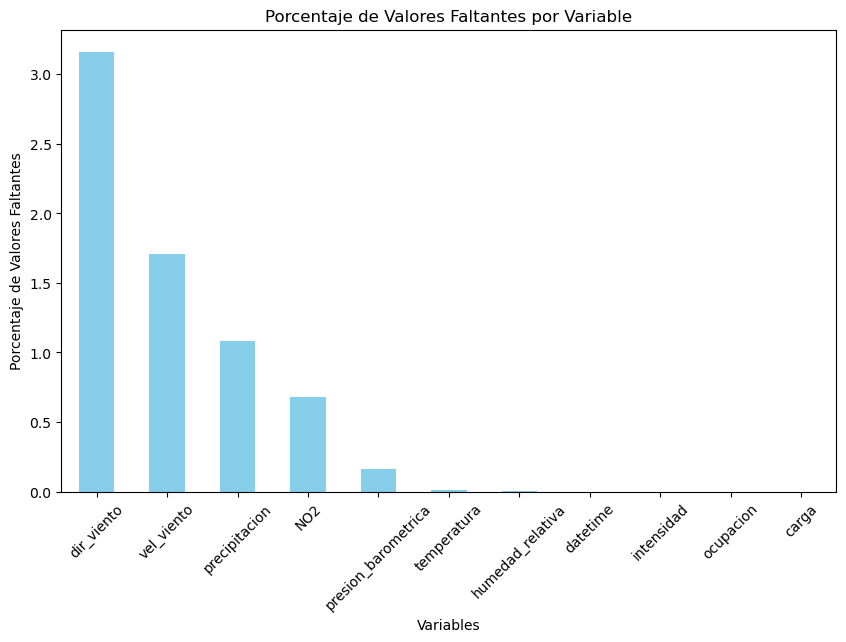

In [479]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de valores faltantes
missing_percentage = df_meteo_test.isnull().mean() * 100

# Ordenar los valores de mayor a menor
missing_percentage = missing_percentage.sort_values(ascending=False)

# Crear la figura
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Valores Faltantes por Variable')
plt.xlabel('Variables')
plt.ylabel('Porcentaje de Valores Faltantes')
plt.xticks(rotation=45)
plt.show()

In [308]:
df_meteo_polucion_trafico_festivos.describe()

,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,CO,NO,NO2,PPM2_5,PPM10,NOX,intensidad,ocupacion,carga,hora_del_dia
count,43110.0000000000,42472.0000000000,43853.0000000000,43856.0000000000,43787.0000000000,43383.0000000000,42623.0000000000,43562.0000000000,43562.0000000000,38274.0000000000,38350.0000000000,43562.0000000000,43859.0000000000,43859.0000000000,43859.0000000000,43859.0000000000
mean,1.1106715379,138.7723205877,16.6025015392,57.3687978840,947.2696234042,0.0467487265,0.3015531521,25.7322666544,41.8585693953,11.0379108533,19.1593741851,81.3101326844,341.9112838870,8.4849403771,25.2917075173,11.5001710025
std,0.5559373611,83.8650284385,8.7921143961,21.9765253762,6.1789252470,0.4500963919,0.2072846984,42.1103956955,28.9001719081,8.7182504239,15.5862531249,88.5433962300,174.1372759236,11.3011831443,15.9389181135,6.9386685846
min,0.0000000000,0.0000000000,-55.0000000000,-25.0000000000,725.0000000000,0.0000000000,0.1000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,2.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
25%,0.6600000000,67.0000000000,10.0000000000,39.0000000000,944.0000000000,0.0000000000,0.2000000000,5.0000000000,21.0000000000,5.0000000000,9.0000000000,30.0000000000,180.0000000000,1.0000000000,11.0000000000,5.0000000000
50%,0.9800000000,112.0000000000,15.6000000000,56.0000000000,947.0000000000,0.0000000000,0.2000000000,11.0000000000,35.0000000000,9.0000000000,15.0000000000,53.0000000000,390.0000000000,5.0000000000,24.0000000000,12.0000000000
75%,1.4100000000,217.0000000000,23.0000000000,76.0000000000,951.0000000000,0.0000000000,0.3000000000,27.0000000000,56.0000000000,14.0000000000,25.0000000000,99.0000000000,475.0000000000,10.0000000000,37.0000000000,18.0000000000
max,5.0400000000,359.0000000000,42.0000000000,100.0000000000,967.0000000000,20.4000000000,2.9000000000,776.0000000000,328.0000000000,146.0000000000,223.0000000000,1484.0000000000,2668.0000000000,85.0000000000,95.0000000000,23.0000000000


### 4.2 Análisis de outliers

Visualizamos la distribución de nuestras variables mediante boxplots donde eliminamos los valores nulos, evitando visualizar outliers sesgados por posibles imputaciones de valores missings.

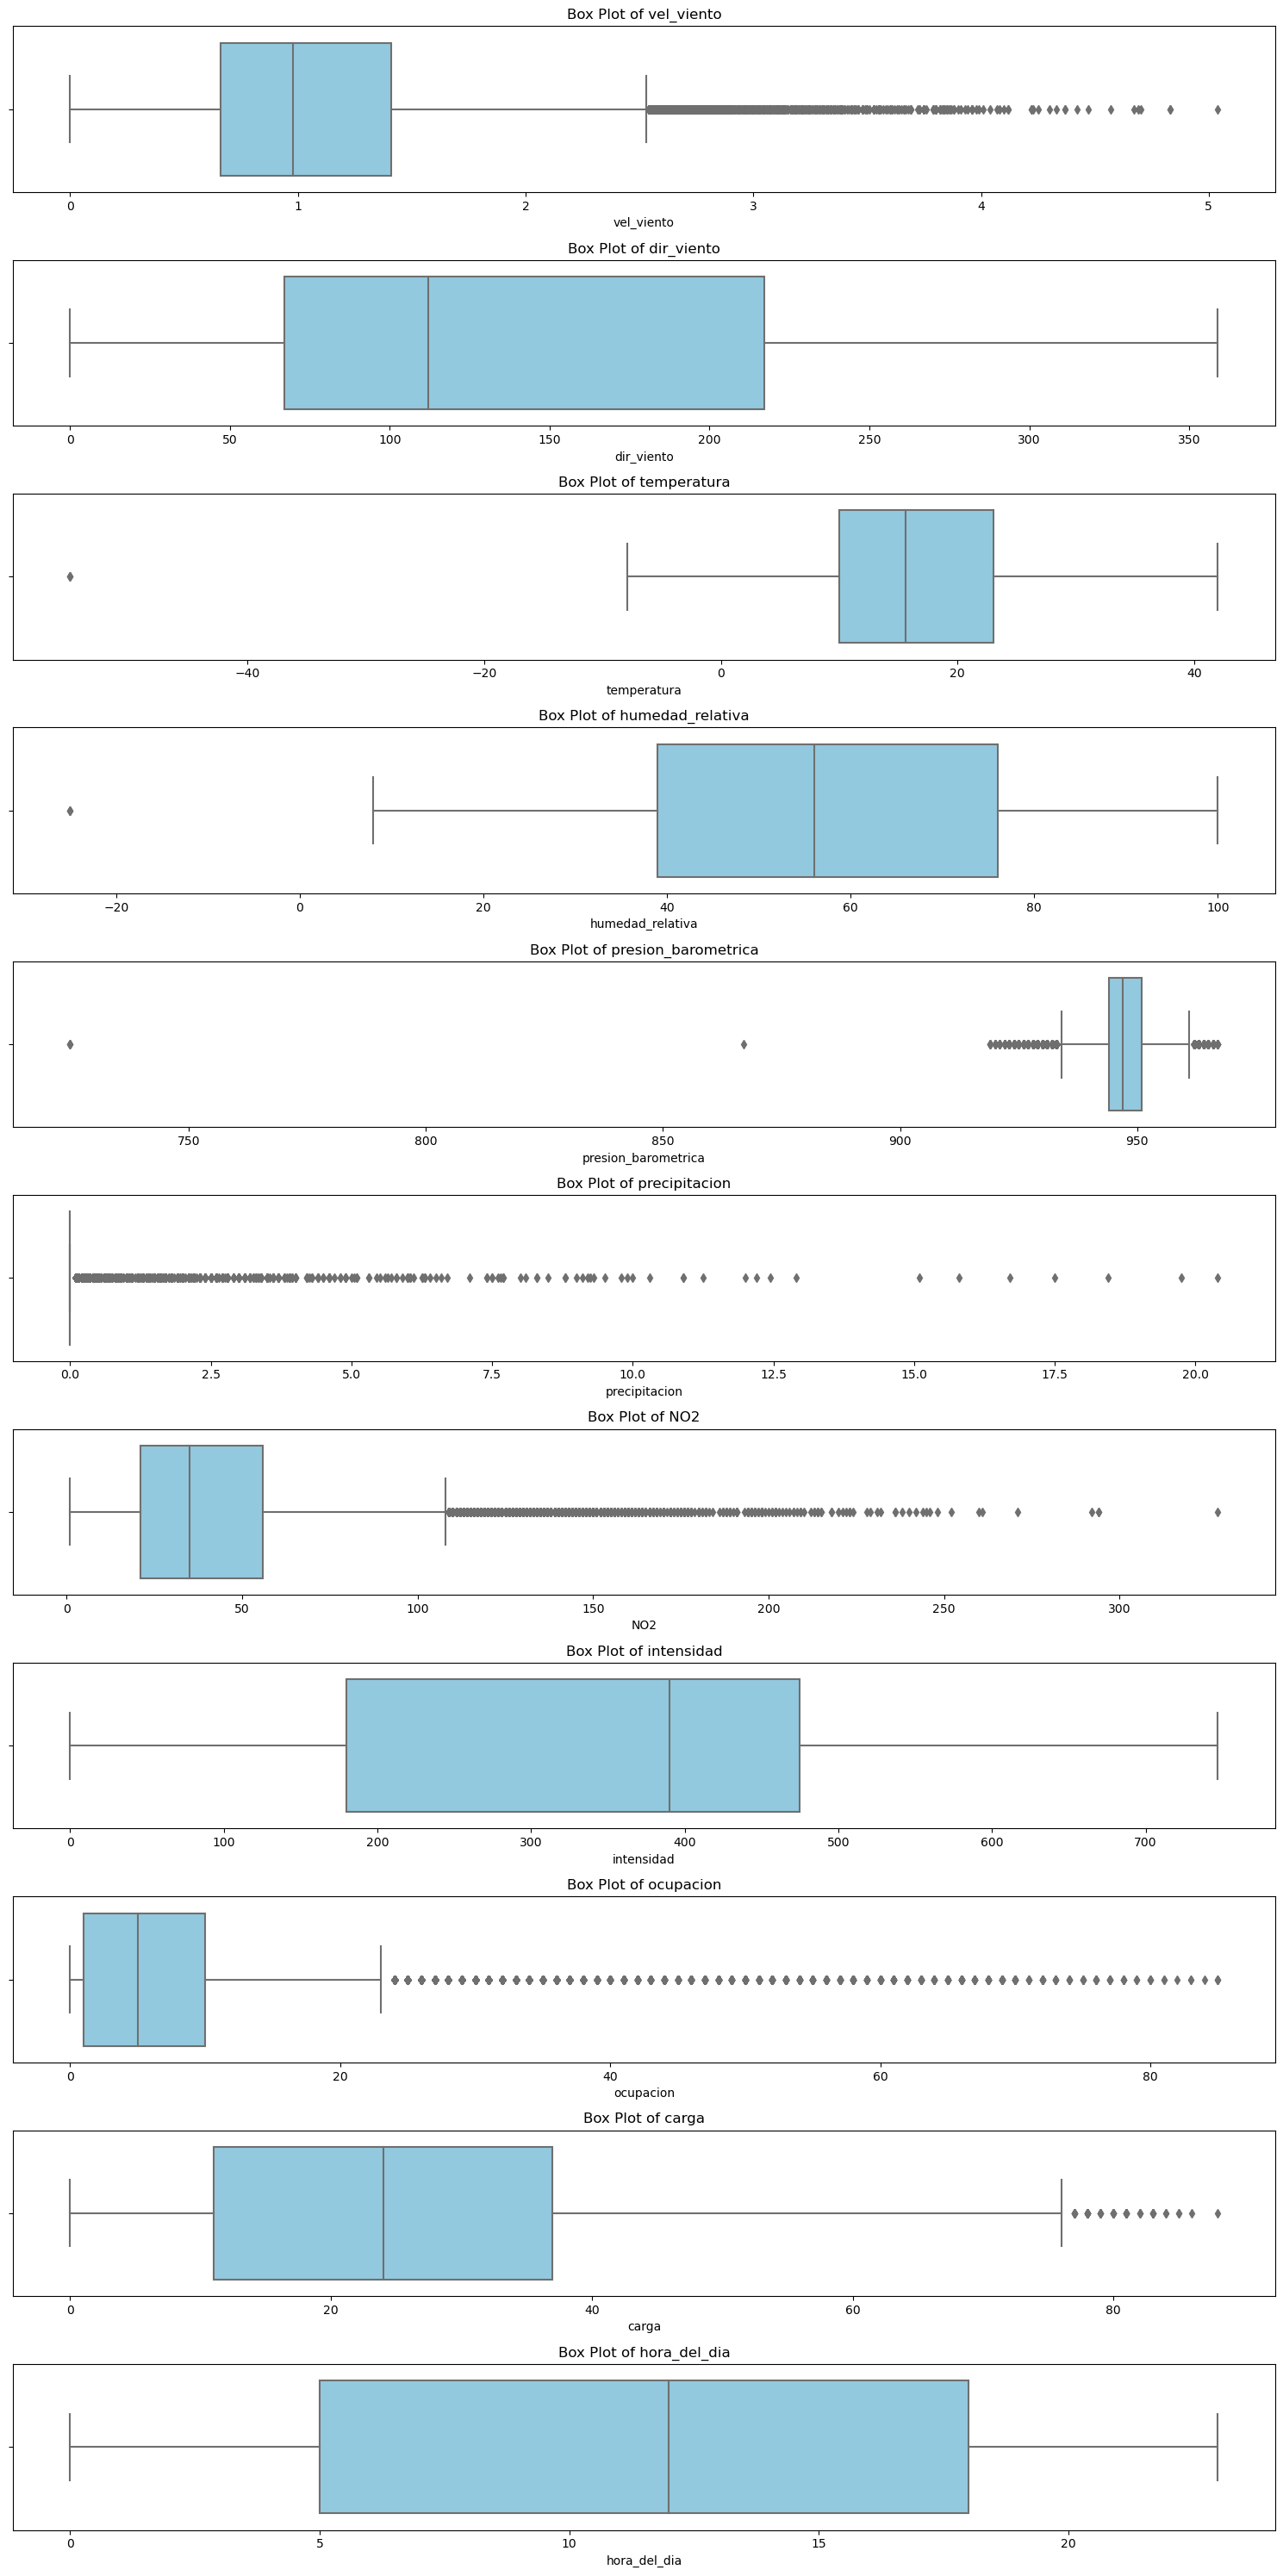

In [480]:
import seaborn as sns

# Visualizar outliers usando gráficos de caja horizontales
plt.figure(figsize=(15, 30))

# Crear un subplot para cada variable numérica y omitir nulos de forma individual
for i, column in enumerate(df_meteo_polucion_trafico_festivos.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(len(df_meteo_polucion_trafico_festivos.select_dtypes(include=[np.number]).columns), 1, i)
    sns.boxplot(x=df_meteo_polucion_trafico_festivos[column].dropna(), orient='h', color="skyblue")  # Boxplot horizontal con color
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Eliminación de outliers basándonos en el rango intercuartílico

In [481]:
# Definir una función para eliminar outliers utilizando el rango intercuartílico (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [482]:
# Aplicar la función a todas las columnas numéricas de forma acumulativa
df_outliers_removed = df_meteo_polucion_trafico_festivos.copy()
for column in df_outliers_removed.select_dtypes(include=[np.number]).columns:
    df_outliers_removed = remove_outliers(df_outliers_removed, column)

In [483]:
df_outliers_removed.shape

(33687, 17)

In [484]:
df_meteo_polucion_trafico_festivos.shape

(43834, 17)

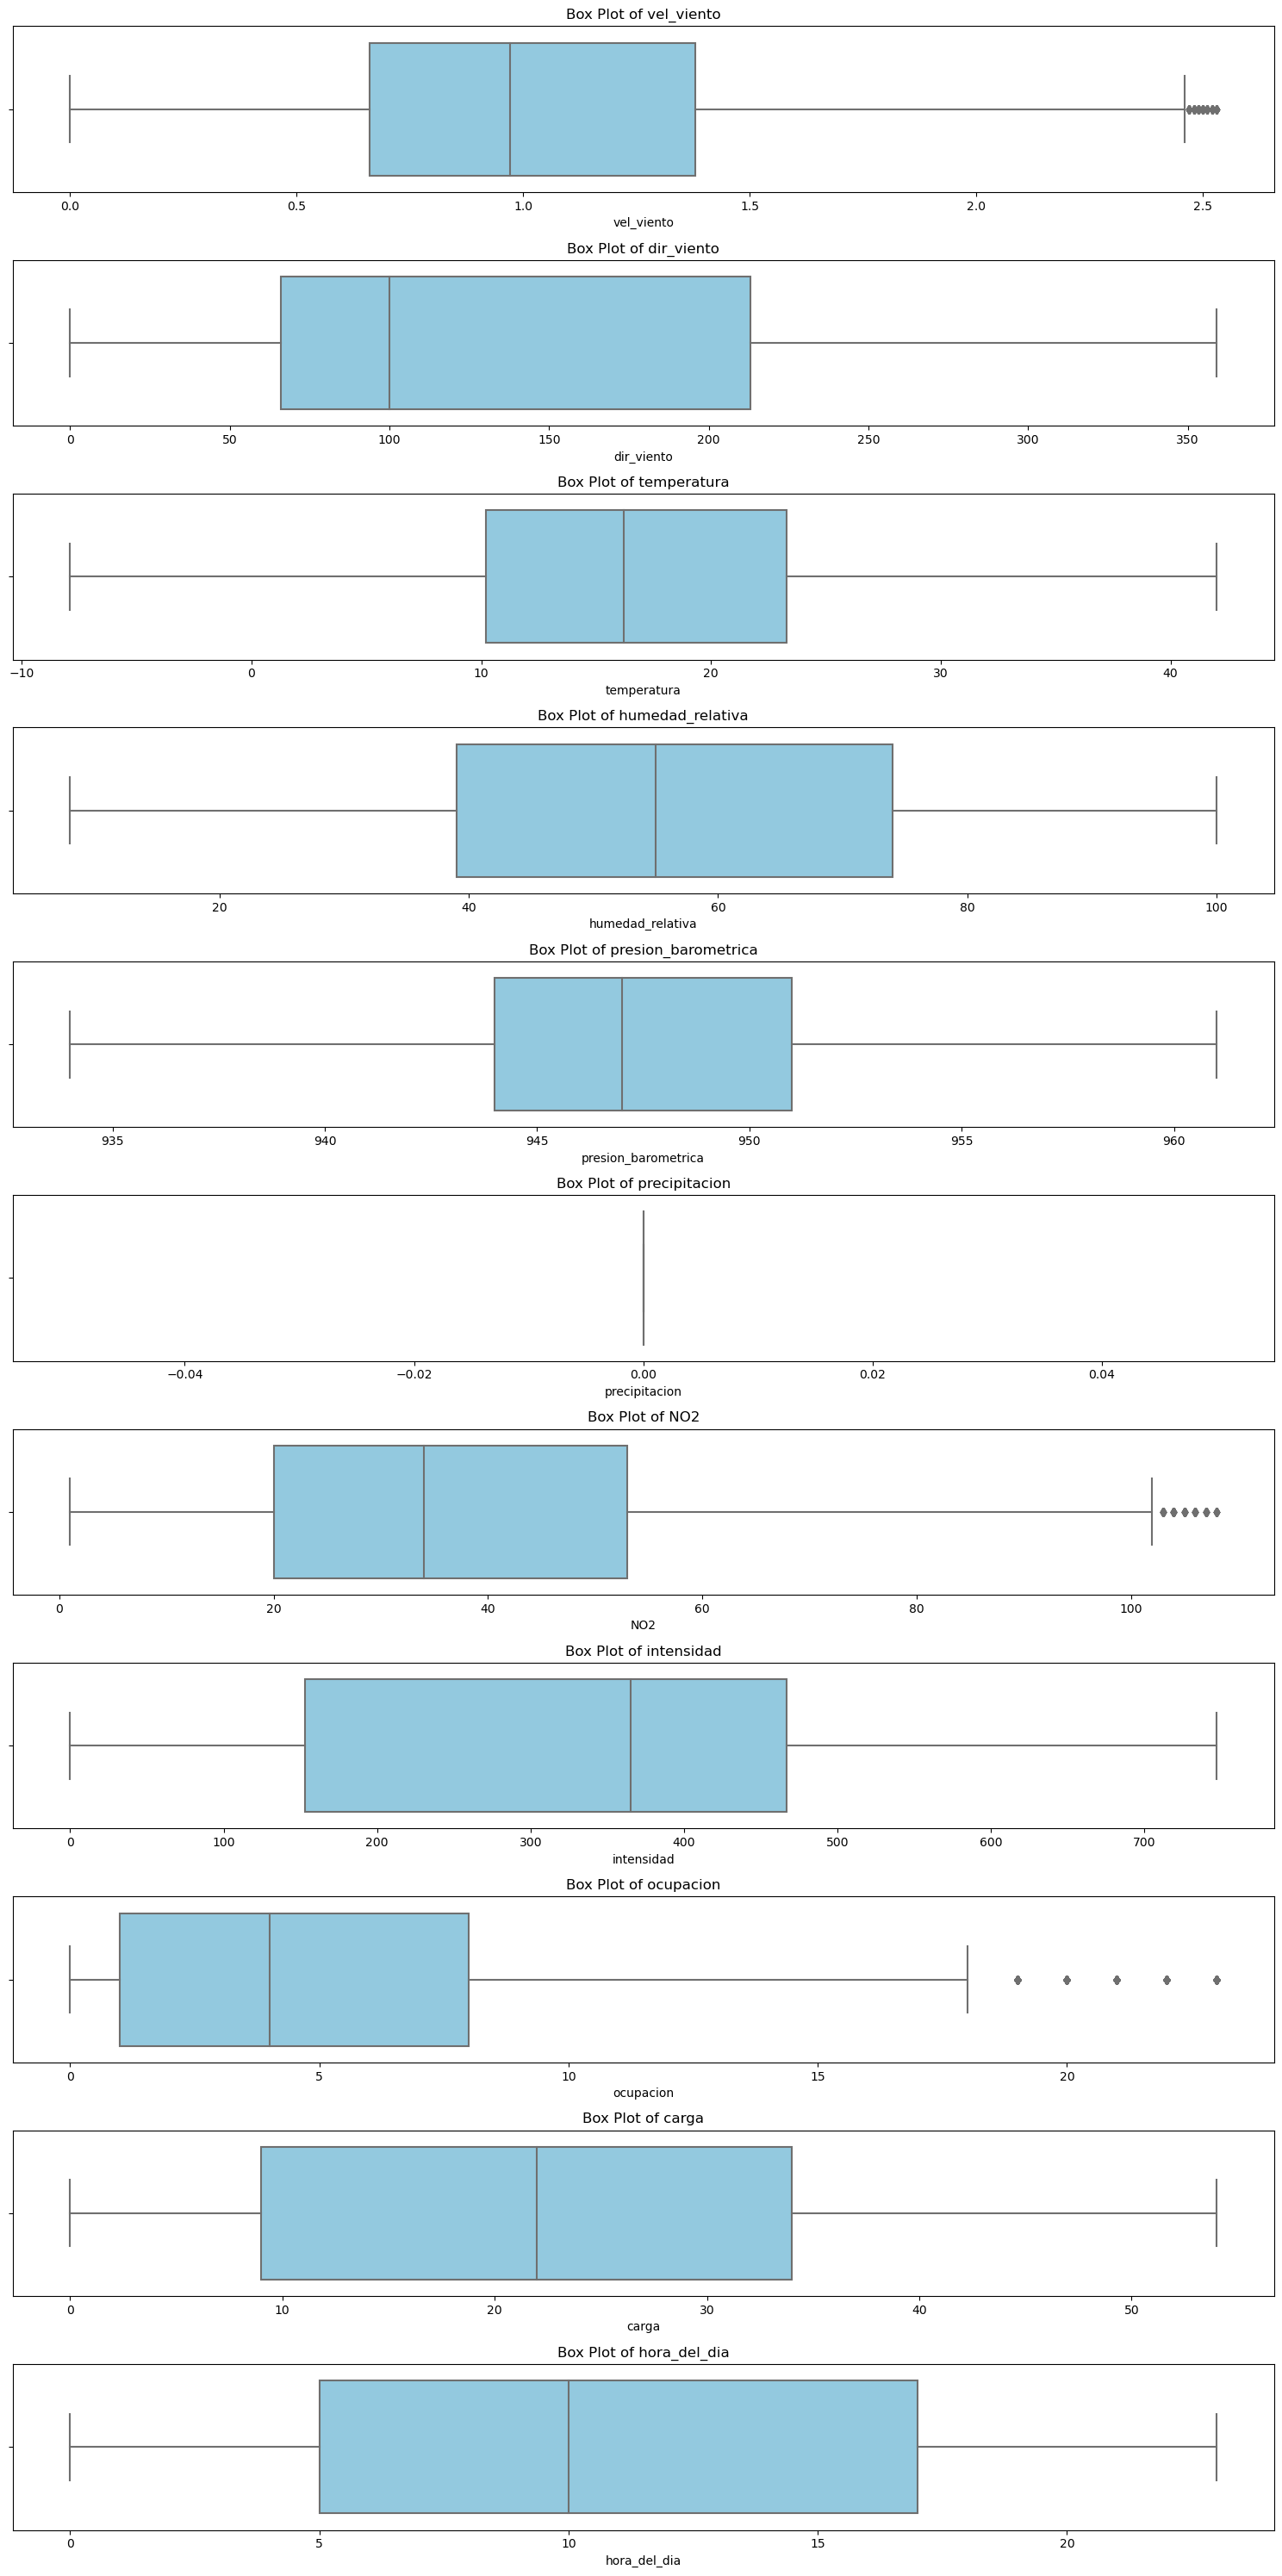

In [485]:
# Visualizar outliers usando gráficos de caja horizontales
plt.figure(figsize=(15, 30))

# Crear un subplot para cada variable numérica y omitir nulos de forma individual
for i, column in enumerate(df_outliers_removed.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(len(df_outliers_removed.select_dtypes(include=[np.number]).columns), 1, i)
    sns.boxplot(x=df_outliers_removed[column].dropna(), orient='h', color="skyblue")  # Boxplot horizontal con color
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Como podemos observar, si eliminamos los outliers nos quedamos con la mitad de los datos. Esto es debido posiblemente a casos como los datos de precipitación o viento, donde, habitualemente se mantienen en 0 y a la que se produzcan precipitaciones o viento se considerarán como outliers. Sin embargo, estos datos pueden ser interesantes para la predicción de la polución.

Vamos a eliminar aquellos puntos que conocemos como valores erróneos, como por ejemplo, temperaturas de -55 grados o presiones inferiores a los 920 milibares.

In [7]:
df_final = df_meteo_polucion_trafico_festivos.copy()

# Configurar el campo datetime como índice
df_final.set_index('datetime', inplace=True)

In [8]:
df_final = df_final[(df_final['temperatura'] > -15) & (df_final['presion_barometrica'] > 920)]

### 4.3 Imputación de missings por interpolación

In [488]:
df_final.isnull().sum()

datetime                  0
vel_viento              746
dir_viento             1374
temperatura               0
humedad_relativa          0
presion_barometrica       0
precipitacion           473
NO2                     294
intensidad                0
ocupacion                 0
carga                     0
franja_horaria            0
estacion                  0
confinamiento             0
festivo                   0
fin_de_semana             0
hora_del_dia              0
dtype: int64

In [490]:
# Imputar valores nulos utilizando interpolación para las columnas específicas
variables_interpolacion = ['vel_viento', 'dir_viento', 'humedad_relativa', 'presion_barometrica','NO2']


df_final[variables_interpolacion] = df_final[variables_interpolacion].interpolate(method='linear')

Vemos que hay valores que no han sido imputados por interpolación. Esto es debido a que dichos valores nulos son puntos consecutivos en el tiempo y por lo tanto no tienen puntos cercanos con los que realizar la interpolación. Vamos a comprobar esto:

In [491]:
df_final.isnull().sum()

datetime                 0
vel_viento               0
dir_viento               0
temperatura              0
humedad_relativa         0
presion_barometrica      0
precipitacion          473
NO2                      0
intensidad               0
ocupacion                0
carga                    0
franja_horaria           0
estacion                 0
confinamiento            0
festivo                  0
fin_de_semana            0
hora_del_dia             0
dtype: int64

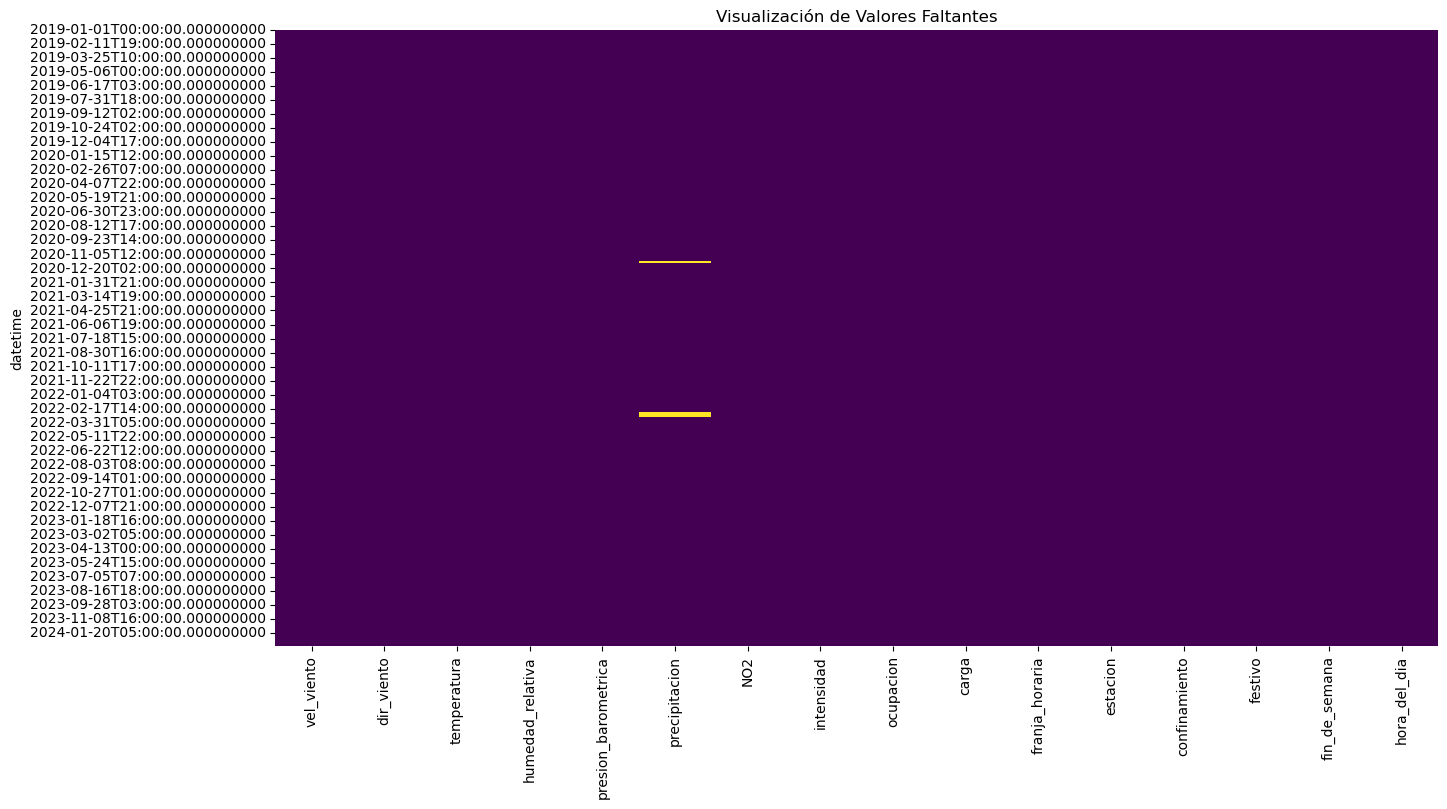

In [492]:
# Configurar el campo datetime como índice
df_final.set_index('datetime', inplace=True)

# Visualizar valores faltantes
plt.figure(figsize=(15, 8))
sns.heatmap(df_final.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de Valores Faltantes')
plt.show()

Vemos que en el caso de las medidas de PPM, se colocarían sensores de medición de dichas partículas en septiembre de 2019 dado que antes de dicha fecha no disponemos de datos.

Para el caso de la precipitación, vamos a imputarlo con el valor medio de precipitaciones en esas fechas en otros años. Para el caso de las PPM2_5 y PPM10, vamos a realizar la predicción de dichas variables a partir de las fechas en las que se tomaron los datos.

In [493]:
# Extraer mes y día del índice datetime
df_final['mes'] = df_final.index.month
df_final['dia'] = df_final.index.day

# Calcular la media de precipitación por mes y día
media_precipitacion = df_final.groupby(['mes', 'dia'])['precipitacion'].transform('mean')

# Imputar valores faltantes en la precipitación con la media calculada
df_final['precipitacion'].fillna(media_precipitacion, inplace=True)

# Eliminar columnas temporales de mes y día
df_final.drop(columns=['mes', 'dia'], inplace=True)

# 5. Visualización de datos

### 5.1 Evolución temporal de las variables numéricas

Dado que las variables meteorológicas y variables de polución son variables que posiblemente presenten cierta estacionalidad o temporalidad, vamos a realizar un análisis visual de dichas variables:

- Variables meteorológicas

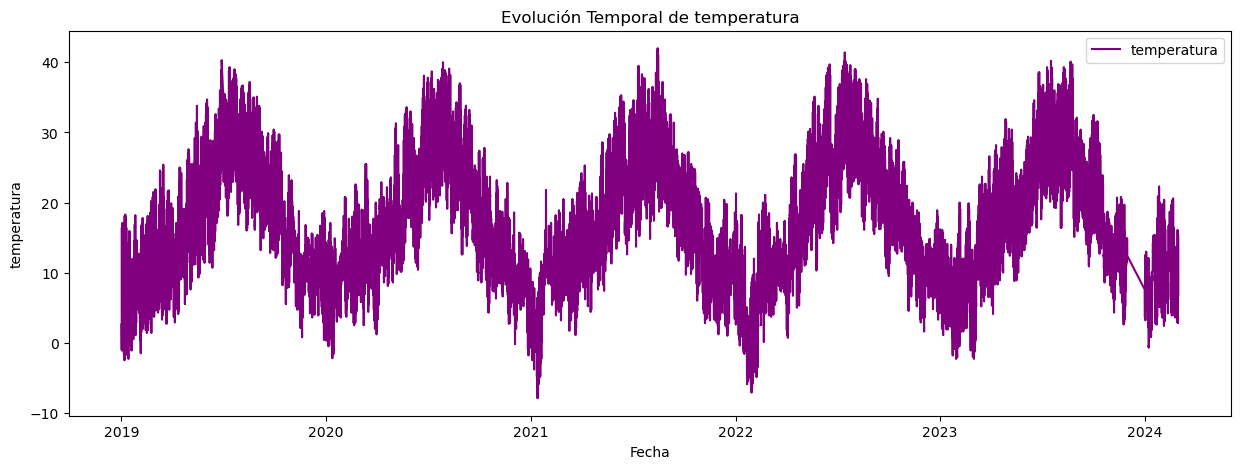

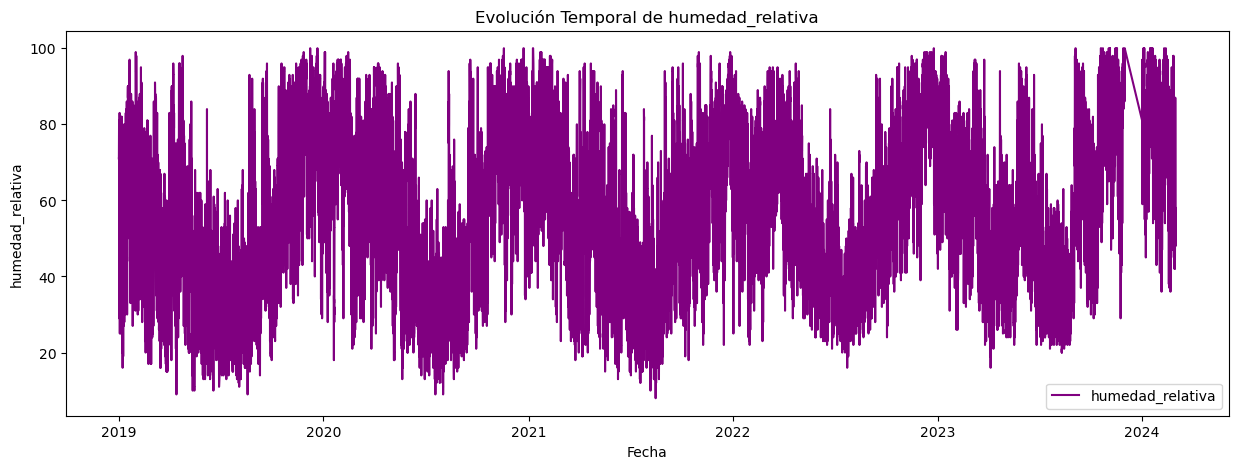

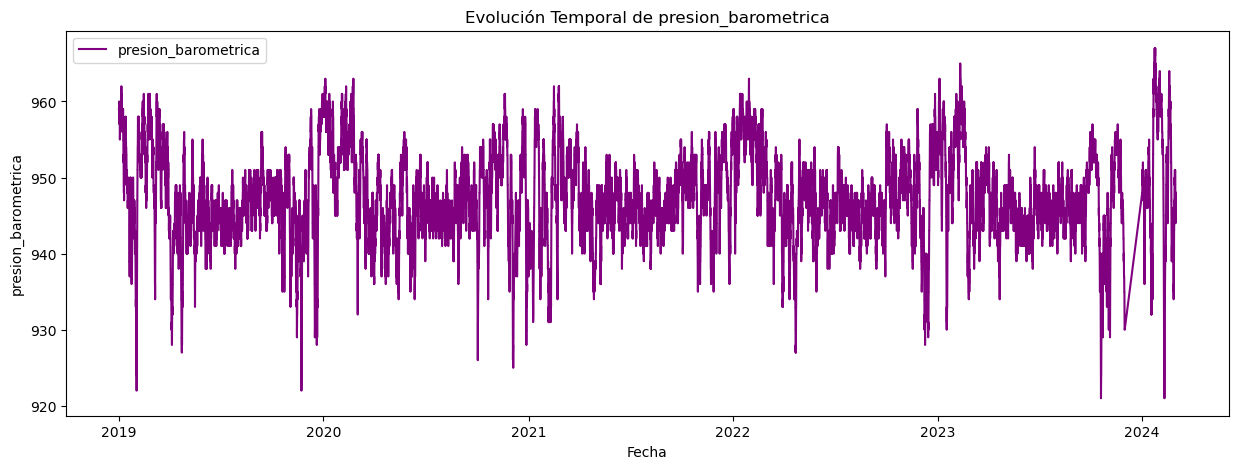

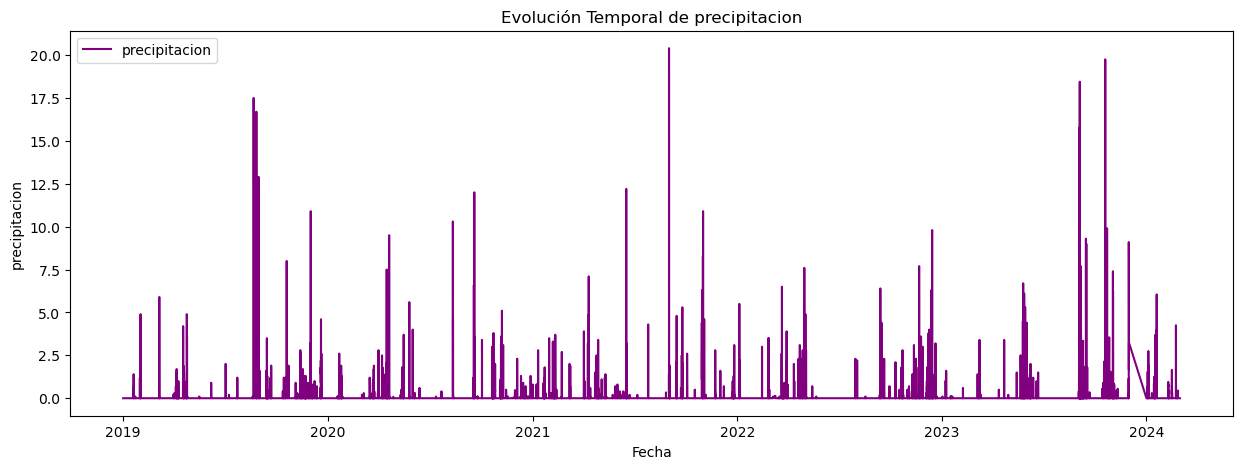

In [499]:
# Variables meteorológicas
variables_meteorologicas = ['temperatura', 'humedad_relativa', 'presion_barometrica', 'precipitacion']

# Crear un gráfico de línea separado para cada variable meteorológica
for variable in variables_meteorologicas:
    plt.figure(figsize=(15, 5))
    plt.plot(df_final.index, df_final[variable], label=variable, color='purple')
    plt.xlabel('Fecha')
    plt.ylabel(variable)
    plt.title(f'Evolución Temporal de {variable}')
    plt.legend()
    plt.show()

- Variables de polución

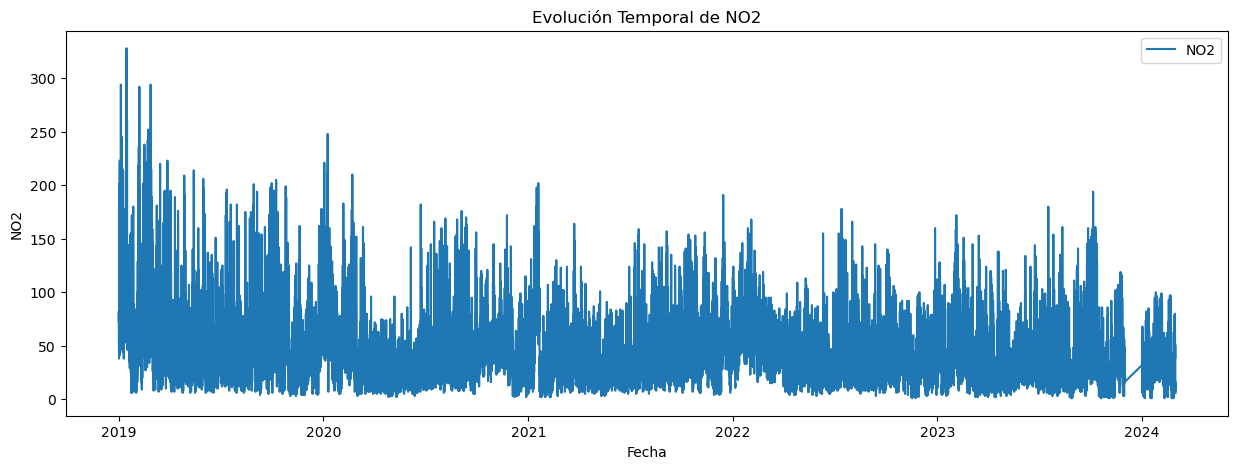

In [496]:
# Variables de polución
variables_polucion = ['NO2']

# Crear un gráfico de línea separado para cada variable de polución
for variable in variables_polucion:
    plt.figure(figsize=(15, 5))
    plt.plot(df_final.index, df_final[variable], label=variable)
    plt.xlabel('Fecha')
    plt.ylabel(variable)
    plt.title(f'Evolución Temporal de {variable}')
    plt.legend()
    plt.show()

Podemos observar que las variables atmosféricas si que presentan estacionalidad. En lo que a las variables de contaminación se refiere, no se observa una estacionalidad clara.

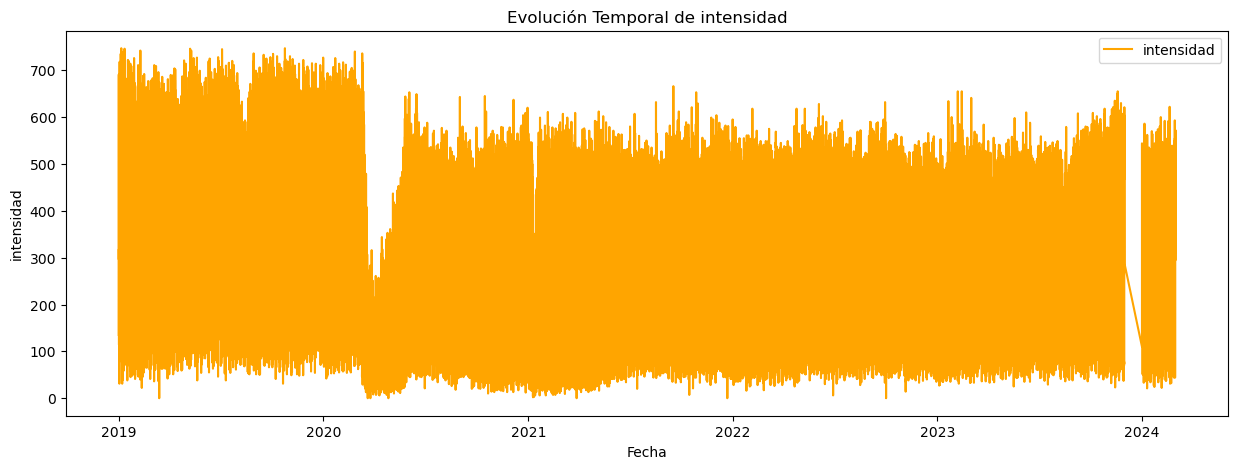

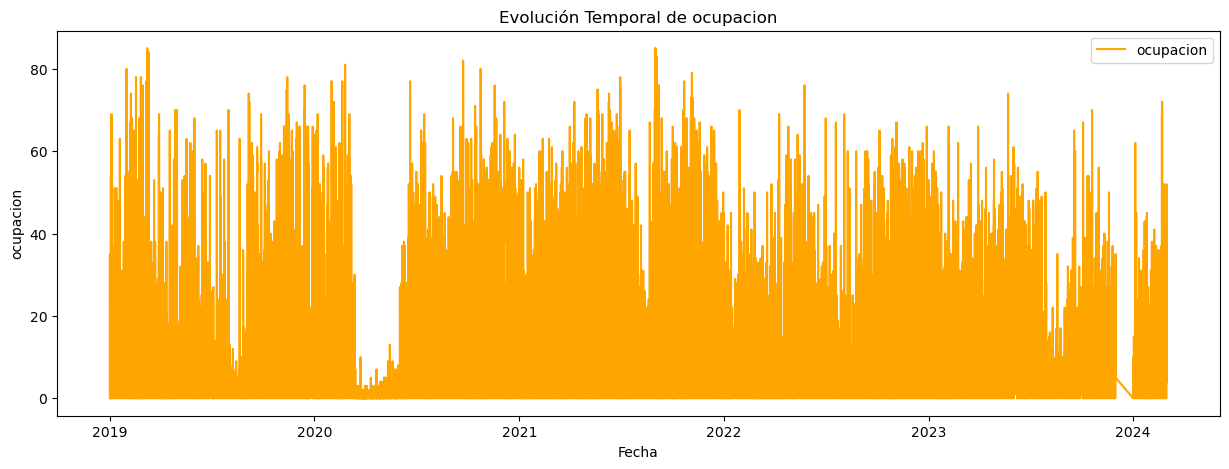

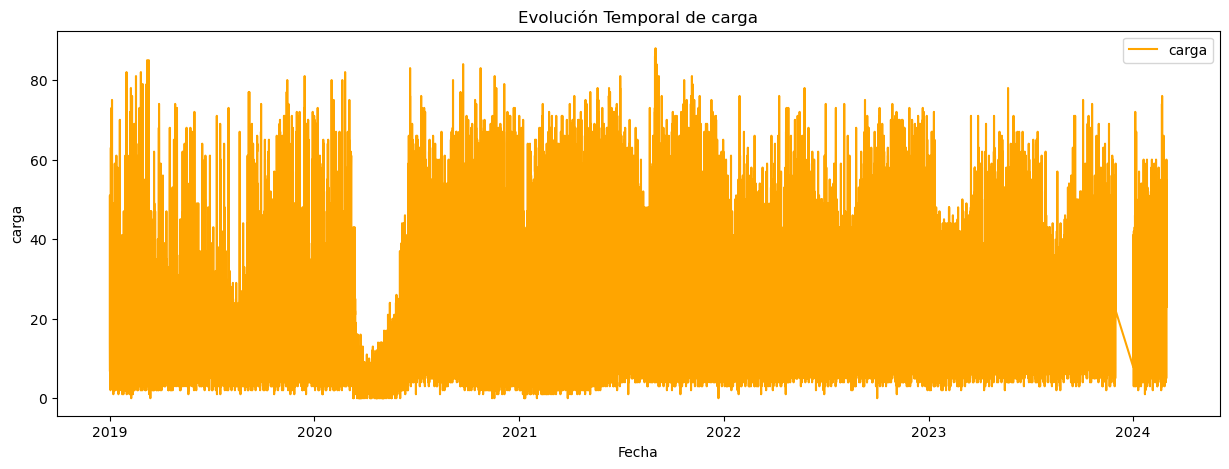

In [500]:
# Variables de polución
variables_intensidad_trafico = ['intensidad', 'ocupacion', 'carga']

# Crear un gráfico de línea separado para cada variable de polución
for variable in variables_intensidad_trafico:
    plt.figure(figsize=(15, 5))
    plt.plot(df_final.index, df_final[variable], label=variable, color='orange')
    plt.xlabel('Fecha')
    plt.ylabel(variable)
    plt.title(f'Evolución Temporal de {variable}')
    plt.legend()
    plt.show()

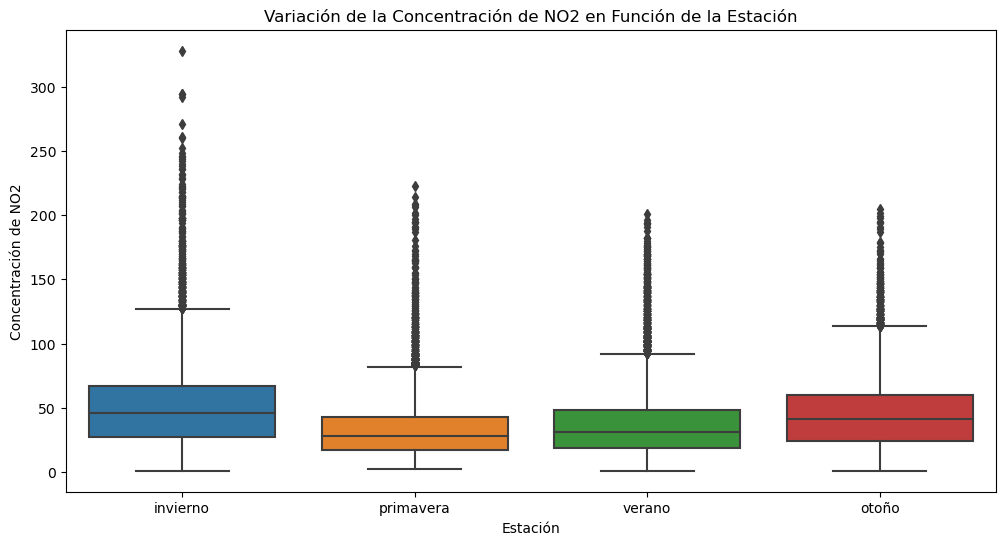

In [540]:
# Crear el gráfico de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='estacion', y='NO2', data=df_final)

# Añadir títulos y etiquetas
plt.title('Variación de la Concentración de NO2 en Función de la Estación')
plt.xlabel('Estación')
plt.ylabel('Concentración de NO2')

# Mostrar el gráfico
plt.show()

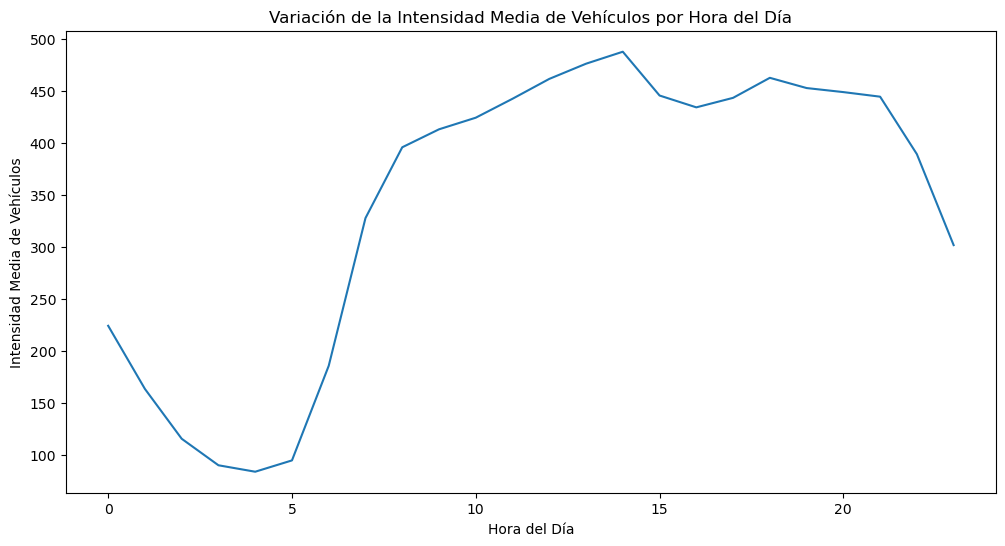

In [541]:
# Agrupar los datos por la hora del día y calcular la media de la intensidad
intensidad_media_por_hora = df_final.groupby('hora_del_dia')['intensidad'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x='hora_del_dia', y='intensidad', data=intensidad_media_por_hora)

# Añadir títulos y etiquetas
plt.title('Variación de la Intensidad Media de Vehículos por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Intensidad Media de Vehículos')

# Mostrar el gráfico
plt.show()

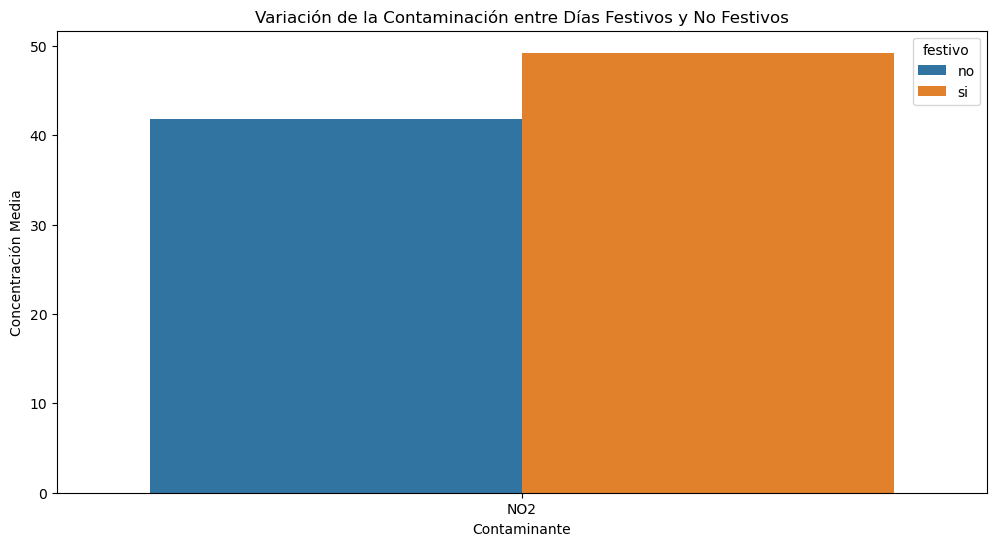

In [542]:
polucion_media_por_festivo = df_final[['NO2', 'festivo']].groupby('festivo').mean().reset_index()

# Derretir el DataFrame para facilitar la visualización con seaborn
polucion_media_por_festivo_melted = pd.melt(polucion_media_por_festivo, id_vars='festivo', var_name='NO2', value_name='Concentración Media')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='NO2', y='Concentración Media', hue='festivo', data=polucion_media_por_festivo_melted)

# Añadir títulos y etiquetas
plt.title('Variación de la Contaminación entre Días Festivos y No Festivos')
plt.xlabel('Contaminante')
plt.ylabel('Concentración Media')

# Mostrar el gráfico
plt.show()

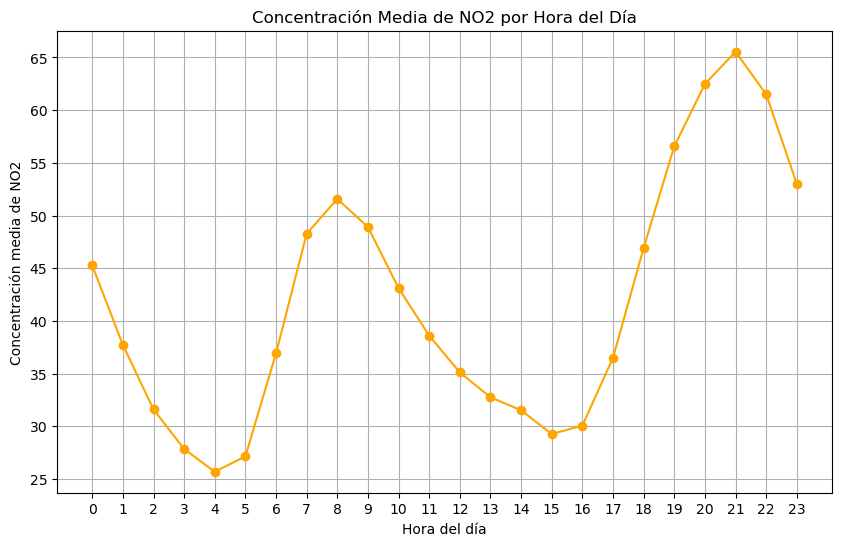

In [543]:
# Agrupar por la hora del día y calcular la media de NO2
no2_by_hour = df_final.groupby('hora_del_dia')['NO2'].mean()

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(no2_by_hour.index, no2_by_hour.values, marker='o', linestyle='-', color='orange')
plt.xlabel('Hora del día')
plt.ylabel('Concentración media de NO2')
plt.title('Concentración Media de NO2 por Hora del Día')
plt.xticks(range(24))  # Asegúrate de que las etiquetas del eje x muestren todas las horas del día
plt.grid(True)
plt.show()

### 5.2 Gráficos de densidad de las variables numéricas

C:\Users\ezxt99454\AppData\Local\Temp\ipykernel_13484\1820936773.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_final[column], shade=True, ax=axes[i])
C:\Users\ezxt99454\AppData\Local\Temp\ipykernel_13484\1820936773.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_final[column], shade=True, ax=axes[i])
C:\Users\ezxt99454\AppData\Local\Temp\ipykernel_13484\1820936773.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_final[column], shade=True, ax=axes[i])
C:\Users\ezxt99454\AppData\Local\Temp\ipykernel_13484\1820936773.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill

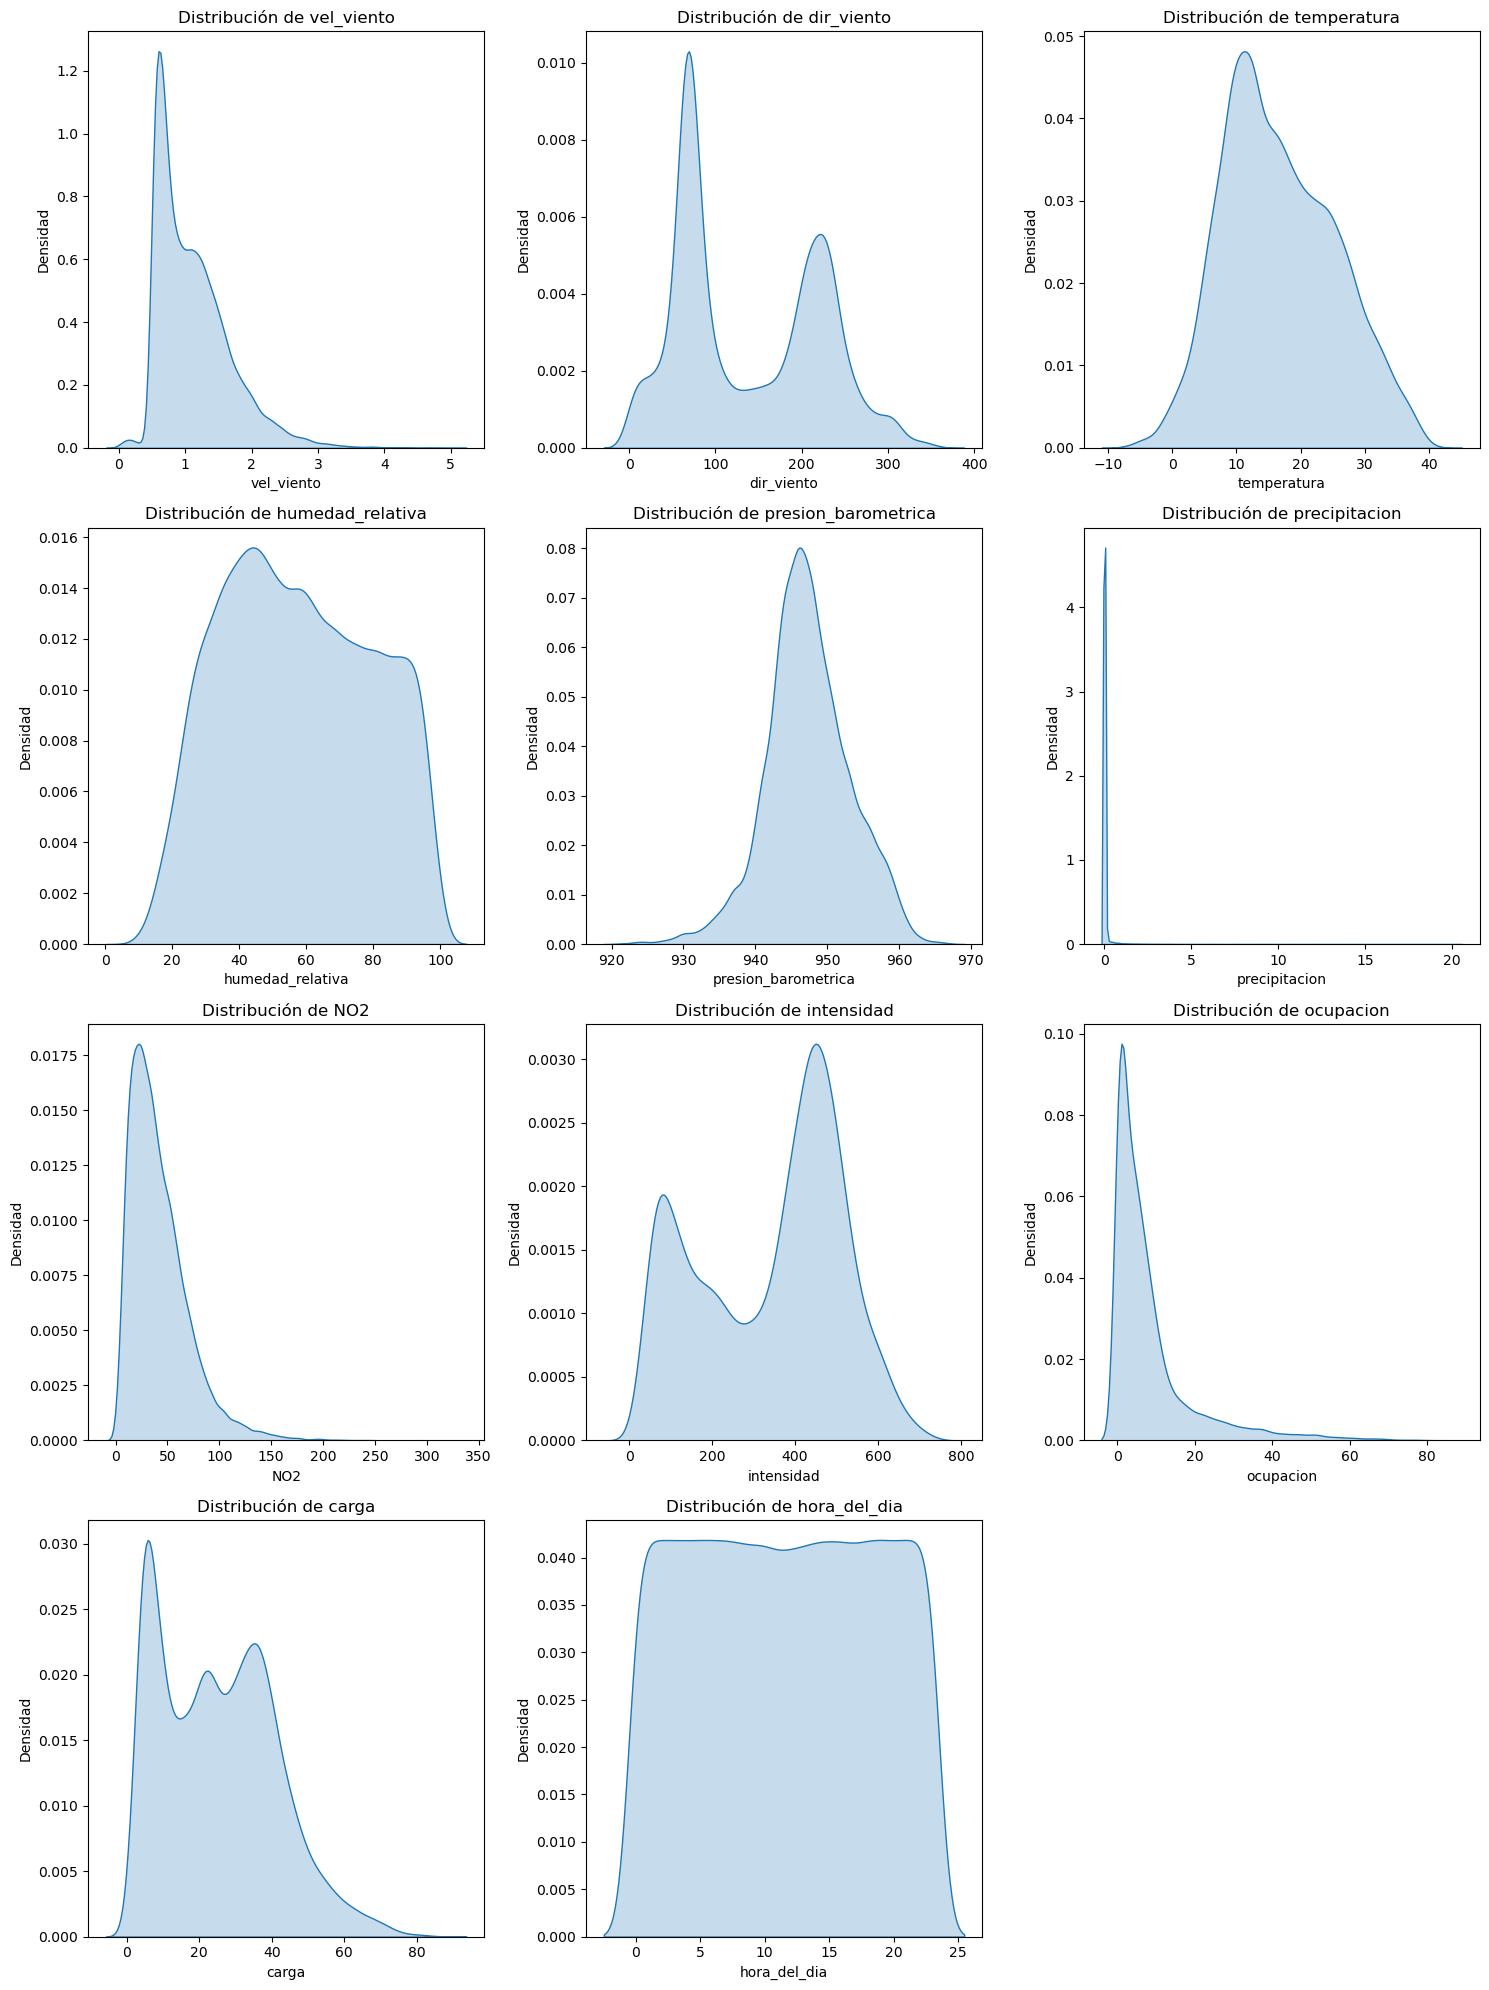

In [501]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir el número de filas y columnas para la cuadrícula
num_cols = df_final.select_dtypes(include=['float64', 'int32', 'int64']).shape[1]
num_rows = (num_cols + 2) // 3  # Ajusta según el número de columnas que desees por fila

# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Aplanar los ejes para facilitar el bucle
axes = axes.flatten()

# Crear gráficos de densidad para cada columna numérica
for i, column in enumerate(df_final.select_dtypes(include=['float64', 'int32', 'int64']).columns):
    sns.kdeplot(df_final[column], shade=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Densidad')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 5.3 Análisis de correlación de variables numéricas

#### 5.3.1 Estandarización de las variables

In [502]:
df_final.columns

Index(['vel_viento', 'dir_viento', 'temperatura', 'humedad_relativa',
       'presion_barometrica', 'precipitacion', 'NO2', 'intensidad',
       'ocupacion', 'carga', 'franja_horaria', 'estacion', 'confinamiento',
       'festivo', 'fin_de_semana', 'hora_del_dia'],
      dtype='object')

In [9]:
# Nos aseguramos de que no contenga nulos
df_final = df_final.dropna()

df_NO2 = df_final.copy()

In [504]:
df_final.describe()

,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,NO2,intensidad,ocupacion,carga,hora_del_dia
count,43747.0000000000,43747.0000000000,43747.0000000000,43747.0000000000,43747.0000000000,43747.0000000000,43747.0000000000,43747.0000000000,43747.0000000000,43747.0000000000,43747.000000000
mean,1.1117060598,138.4040734222,16.6323130729,57.3709511509,947.2925457746,0.0467663855,41.8488924955,341.4414016961,8.4781356436,25.2737330560,11.497908428
std,0.5512173895,82.8821758058,8.7556247209,21.9701839309,5.8735630348,0.4482376620,28.8464713857,172.6393491258,11.2994366948,15.9304216857,6.940025878
min,0.0000000000,0.0000000000,-7.9000000000,8.0000000000,921.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.000000000
25%,0.6700000000,67.0000000000,10.0000000000,39.0000000000,944.0000000000,0.0000000000,21.0000000000,180.0000000000,1.0000000000,11.0000000000,5.000000000
50%,0.9900000000,113.9058295964,15.6000000000,56.0000000000,947.0000000000,0.0000000000,35.0000000000,390.0000000000,5.0000000000,24.0000000000,12.000000000
75%,1.4100000000,215.0000000000,23.1000000000,76.0000000000,951.0000000000,0.0000000000,56.0000000000,475.0000000000,10.0000000000,37.0000000000,18.000000000
max,5.0400000000,359.0000000000,42.0000000000,100.0000000000,967.0000000000,20.4000000000,328.0000000000,747.0000000000,85.0000000000,88.0000000000,23.000000000


Casi todas las variables siguen una distribución normal y, dado que tienen diferentes escalas, vamos a estandarizar nuestras variables 

Mantenemos el indice

In [387]:
from sklearn.preprocessing import StandardScaler

def standarize_dataframe(df, target_col):
    df_scaled = df.copy()

    # Identificar columnas numéricas y categóricas
    numerical_cols = df_scaled.select_dtypes(include=['float64', 'int32', 'int64']).columns
    categorical_cols = df_scaled.select_dtypes(include=['object', 'category']).columns

    # Eliminar la columna objetivo de numerical_cols
    numerical_cols = numerical_cols.drop(target_col)

    # Inicializar los StandardScalers
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    # Definir los datos
    X = df_scaled[numerical_cols]
    X_cathegorical = df_scaled[categorical_cols]
    y = df_scaled[[target_col]]

    # Guardar el índice original
    original_index = df_scaled.index

    # Aplicar la estandarización
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)

    # Convertir arrays escalados de nuevo a DataFrames
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=original_index)
    y_scaled_df = pd.DataFrame(y_scaled, columns=[target_col], index=original_index)

    df_scaled = pd.concat([X_scaled_df, X_cathegorical.reset_index(drop=True).set_index(original_index), y_scaled_df], axis=1)

    return df_scaled, scaler_X, scaler_y

In [388]:
df_scaled, scaler_X, scaler_y = standarize_dataframe(df_NO2, target_col = 'NO2')

In [389]:
print(df_scaled.index[:10])

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)


In [390]:
df_scaled.head(10)

,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,intensidad,ocupacion,carga,hora_del_dia,franja_horaria,estacion,confinamiento,festivo,fin_de_semana,NO2
datetime,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-0.7797182835,-1.0828495800,-1.6244149678,0.6262149815,1.9897771675,-0.1049755686,-1.1863592059,-0.7500344938,-1.1417167876,-1.6531794985,madrugada,invierno,no,si,no,1.0863203292
2019-01-01 01:00:00,-0.7616837033,-1.2733152714,-1.6359835540,0.6262149815,1.9897771675,-0.1049755686,2.0231428356,-0.3958216593,0.1101922542,-1.5092377274,madrugada,invierno,no,si,no,1.3976479864
2019-01-01 02:00:00,-0.7436491232,-1.1423701086,-1.7285322434,0.7627666347,1.9897771675,-0.1049755686,2.0289257222,2.3493278085,1.6124831044,-1.3652959562,madrugada,invierno,no,si,no,1.0517283673
2019-01-01 03:00:00,-0.7436491232,-0.7733428314,-1.7979437605,0.8082838524,1.9897771675,-0.1049755686,0.9648745949,-0.4843748679,-0.3279759104,-1.2213541850,madrugada,invierno,no,si,no,0.8441765959
2019-01-01 04:00:00,-0.8157874438,-0.8566715714,-1.7863751743,0.7627666347,1.9897771675,-0.1049755686,0.1784020225,-0.5729280766,-0.7035486230,-1.0774124138,madrugada,invierno,no,si,no,0.7749926721
2019-01-01 05:00:00,-0.7977528636,-1.2852193772,-1.9020610362,0.9448355056,1.9897771675,-0.1049755686,-0.2553144696,-0.5729280766,-0.8913349793,-0.9334706427,madrugada,invierno,no,si,no,0.4982569768
2019-01-01 06:00:00,-0.5813379019,-0.8566715714,-1.9599039671,1.0358699410,1.9897771675,-0.1049755686,-0.1280909652,-0.7500344938,-0.8287395272,-0.7895288715,madrugada,invierno,no,si,no,0.4982569768
2019-01-01 07:00:00,-0.6174070621,-0.9161921000,-1.9599039671,0.9903527233,1.9897771675,-0.1049755686,-0.1801369443,-0.5729280766,-0.7661440751,-0.6455871003,mañana,invierno,no,si,no,0.3598891292
2019-01-01 08:00:00,-0.4731304210,-0.7257264086,-2.0408840704,1.0813871588,2.1591730660,-0.1049755686,-0.7584256004,-0.6614812852,-1.1417167876,-0.5016453291,mañana,invierno,no,si,no,0.2561132435


In [48]:
df_scaled.shape

(41513, 15)

C:\Users\ezxt99454\AppData\Local\Temp\ipykernel_13484\3417358205.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_scaled.corr()


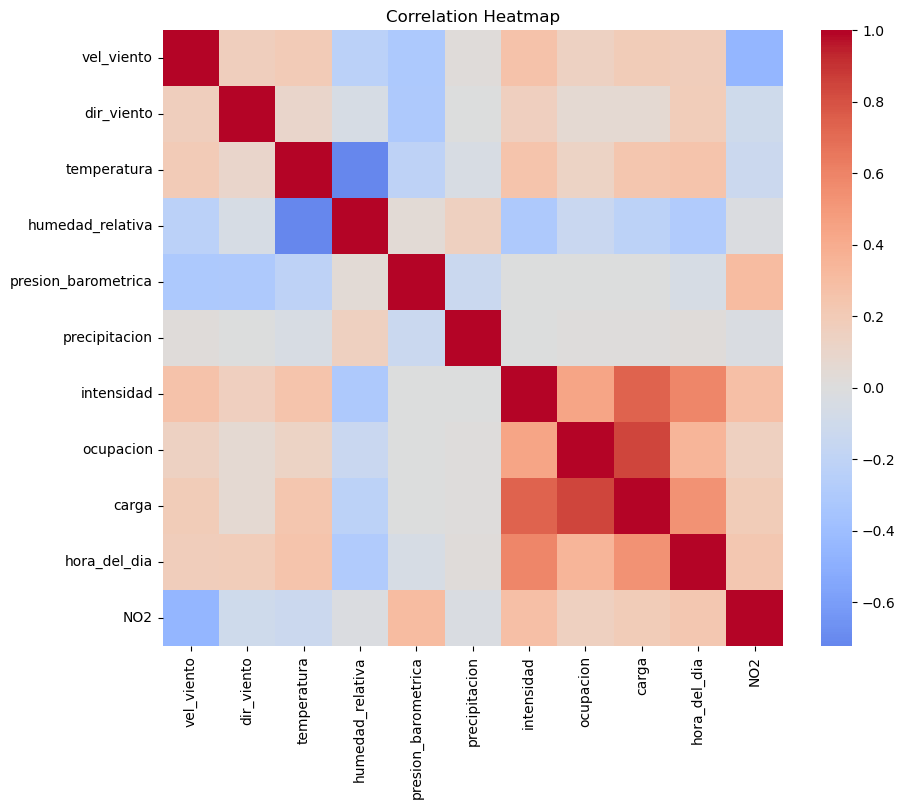

In [322]:
# Compute the correlation matrix
correlation_matrix = df_scaled.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Correlación de las features con cada una de las variables de polución:

C:\Users\ezxt99454\AppData\Local\Temp\ipykernel_13484\909136077.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_scaled[non_target_cols + [target_col]].corr()


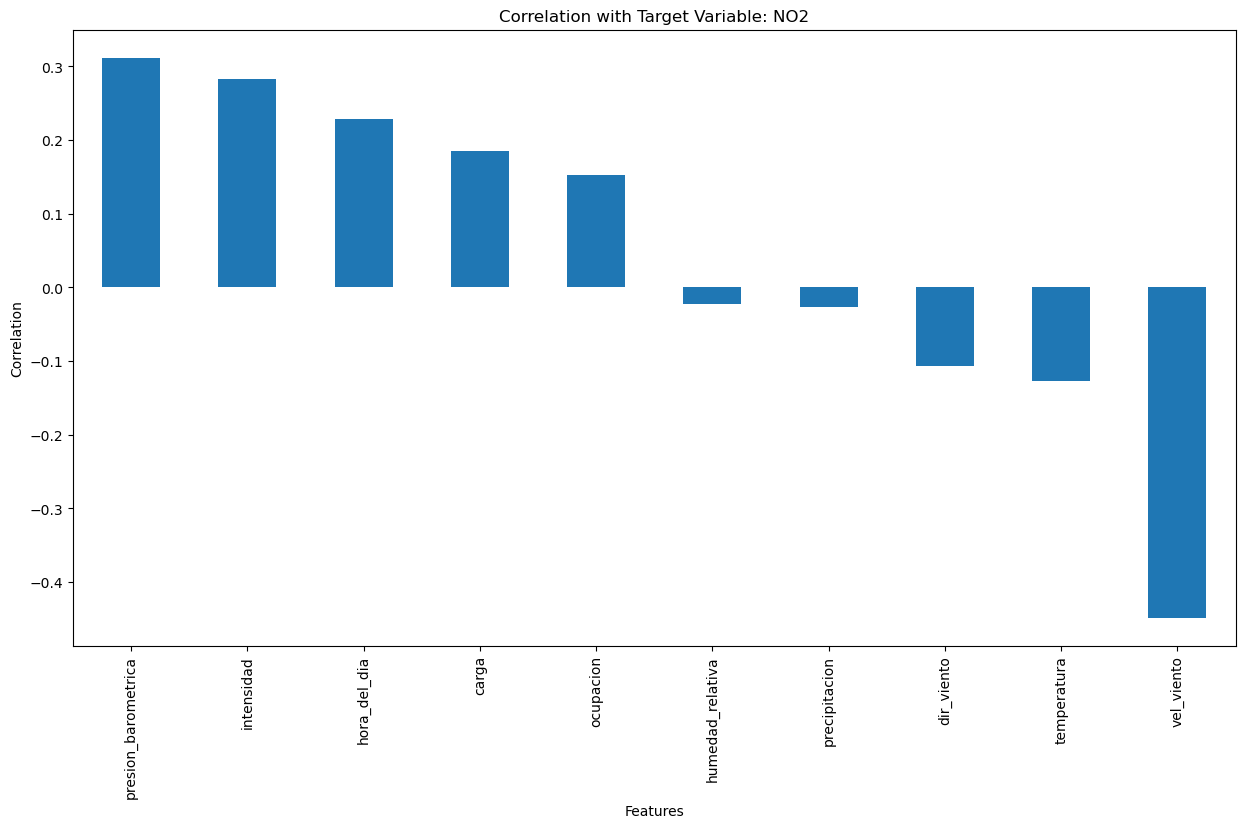

In [380]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_final es tu DataFrame con las variables especificadas
target_col = 'NO2'

# Calcular la matriz de correlación excluyendo las otras variables de polución
non_target_cols = [col for col in df_scaled.columns if col != target_col]

correlation_matrix = df_scaled[non_target_cols + [target_col]].corr()

# Extraer la correlación con la variable objetivo actual excluyendo las otras variables de polución
correlation_with_target = correlation_matrix[target_col].drop(target_col)

# Crear un único gráfico para visualizar la correlación
plt.figure(figsize=(15, 8))
correlation_with_target.sort_values(ascending=False).plot(kind='bar')
plt.title(f'Correlation with Target Variable: {target_col}')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()


Vemos que tenemos un patrón de correlación similar con las diferentes variables objetivo dado que existe una elevada corrolación entre las propias variables de polución.

# 6. Modelos predictivos de polución

### 6.1 One Hot encoder a variables categóricas

In [437]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = df_scaled.select_dtypes(include=['object', 'category']).columns

# Inicializar el OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Ajustar y transformar las variables categóricas
encoded_cols = encoder.fit_transform(df_scaled[categorical_cols])

# Convertir el resultado a un DataFrame
# encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))

# Convertir el resultado a un DataFrame
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols), index=df_scaled.index)


# Combinar el DataFrame original con el DataFrame codificado, excluyendo las columnas categóricas originales
df_final_modelo = pd.concat([df_scaled.drop(columns=categorical_cols), encoded_df], axis=1)

c:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [392]:
df_final_modelo.head(10)

,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,intensidad,ocupacion,carga,hora_del_dia,NO2,franja_horaria_mañana,franja_horaria_medio_dia,franja_horaria_noche,franja_horaria_tarde,estacion_otoño,estacion_primavera,estacion_verano,confinamiento_si,festivo_si,fin_de_semana_si
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-0.7797182835,-1.0828495800,-1.6244149678,0.6262149815,1.9897771675,-0.1049755686,-1.1863592059,-0.7500344938,-1.1417167876,-1.6531794985,1.0863203292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-01 01:00:00,-0.7616837033,-1.2733152714,-1.6359835540,0.6262149815,1.9897771675,-0.1049755686,2.0231428356,-0.3958216593,0.1101922542,-1.5092377274,1.3976479864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-01 02:00:00,-0.7436491232,-1.1423701086,-1.7285322434,0.7627666347,1.9897771675,-0.1049755686,2.0289257222,2.3493278085,1.6124831044,-1.3652959562,1.0517283673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-01 03:00:00,-0.7436491232,-0.7733428314,-1.7979437605,0.8082838524,1.9897771675,-0.1049755686,0.9648745949,-0.4843748679,-0.3279759104,-1.2213541850,0.8441765959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-01 04:00:00,-0.8157874438,-0.8566715714,-1.7863751743,0.7627666347,1.9897771675,-0.1049755686,0.1784020225,-0.5729280766,-0.7035486230,-1.0774124138,0.7749926721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-01 05:00:00,-0.7977528636,-1.2852193772,-1.9020610362,0.9448355056,1.9897771675,-0.1049755686,-0.2553144696,-0.5729280766,-0.8913349793,-0.9334706427,0.4982569768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-01 06:00:00,-0.5813379019,-0.8566715714,-1.9599039671,1.0358699410,1.9897771675,-0.1049755686,-0.1280909652,-0.7500344938,-0.8287395272,-0.7895288715,0.4982569768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-01 07:00:00,-0.6174070621,-0.9161921000,-1.9599039671,0.9903527233,1.9897771675,-0.1049755686,-0.1801369443,-0.5729280766,-0.7661440751,-0.6455871003,0.3598891292,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2019-01-01 08:00:00,-0.4731304210,-0.7257264086,-2.0408840704,1.0813871588,2.1591730660,-0.1049755686,-0.7584256004,-0.6614812852,-1.1417167876,-0.5016453291,0.2561132435,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### 6.2 Predicción variable NO2

Hora de entrenar los modelos! Se va a aplicar validación cruzada variando algunas combinaciones sobre los datos de entrada como son:

- Mantener o no el periodo de confinamiento
- Imputar por inferencia o eliminar los datos missings
- Mantener o eliminar los outliers


In [448]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df_final_modelo.drop(columns=['NO2'], axis=1)
y = df_final_modelo['NO2']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [383]:
print(df_final_modelo.index[:10])

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00'],
              dtype='datetime64[ns]', name='datetime', freq=None)


Split 80% train / 20% test
In the train set, the cross validation will select different validation sets (20% from total) in each iterations.

#### 6.2.1 Datos completos sin eliminar los datos del COVID pero SIN ELIMINAR OUTLIERS INTENSIDAD DE TRAFICO. Sin interpolar los datos

Linear Regression: Mean CV RMSE = 0.71, Std CV RMSE = 0.01
Linear Regression: Mean CV R^2 = 0.50, Std CV R^2 = 0.01
Random Forest: Mean CV RMSE = 0.49, Std CV RMSE = 0.01
Random Forest: Mean CV R^2 = 0.76, Std CV R^2 = 0.01
Gradient Boosting: Mean CV RMSE = 0.53, Std CV RMSE = 0.01
Gradient Boosting: Mean CV R^2 = 0.71, Std CV R^2 = 0.01
SVM: Mean CV RMSE = 0.50, Std CV RMSE = 0.00
SVM: Mean CV R^2 = 0.74, Std CV R^2 = 0.01
Decision Tree: Mean CV RMSE = 0.71, Std CV RMSE = 0.00
Decision Tree: Mean CV R^2 = 0.50, Std CV R^2 = 0.01
XGBoost: Mean CV RMSE = 0.47, Std CV RMSE = 0.01
XGBoost: Mean CV R^2 = 0.78, Std CV R^2 = 0.01


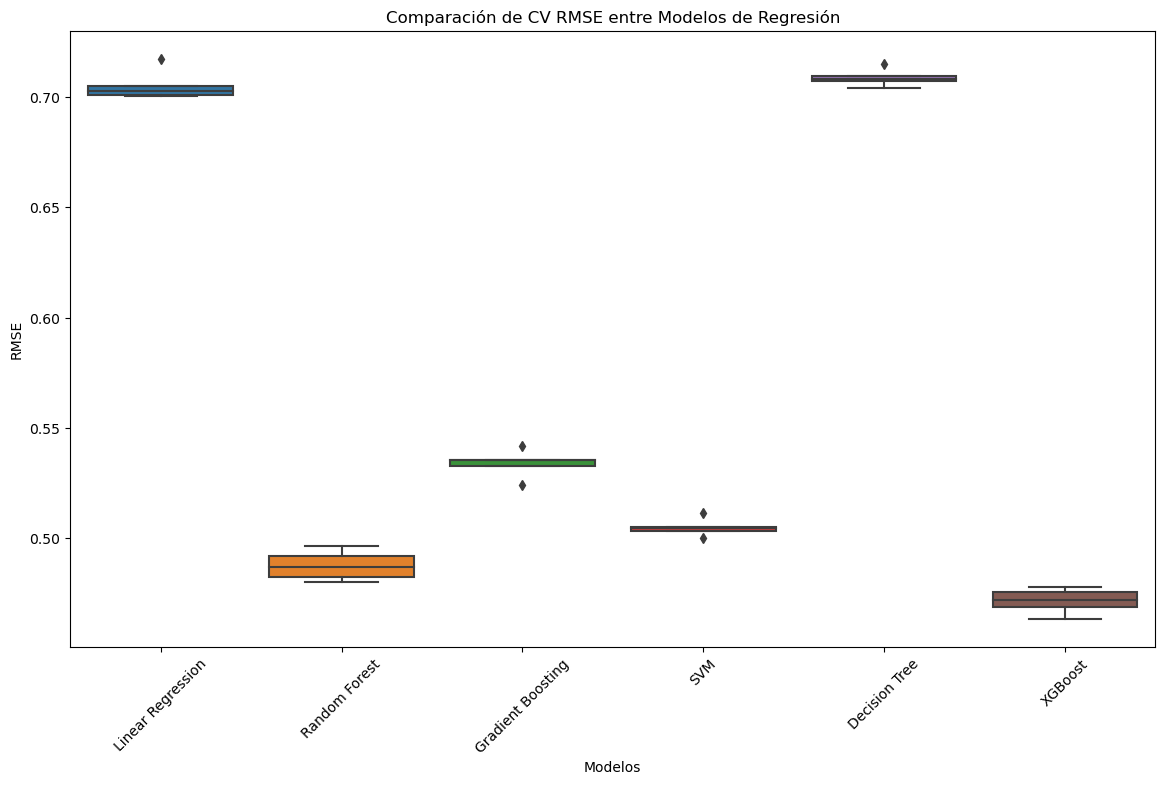

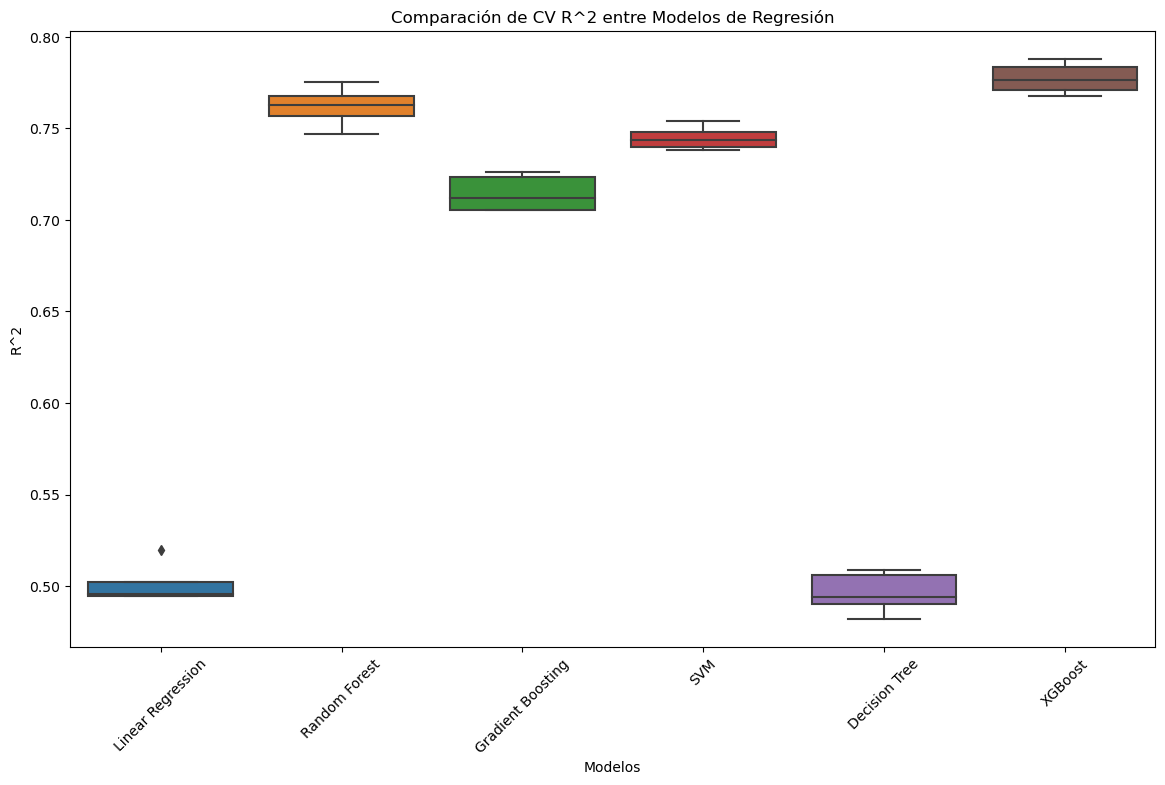

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

# Lista de modelos de regresión
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVM', SVR()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('XGBoost', xgb.XGBRegressor(random_state=42))
]

# Diccionario para almacenar los resultados de validación cruzada
results_cv_rmse = {}
results_cv_r2 = {}

# Scorers para RMSE y R2
rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)

# Evaluar cada modelo utilizando validación cruzada
for name, model in models:
    # Calcular RMSE con validación cruzada
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_scorer)
    results_cv_rmse[name] = cv_scores_rmse
    
    # Calcular R^2 con validación cruzada
    cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring=r2_scorer)
    results_cv_r2[name] = cv_scores_r2
    
    print(f"{name}: Mean CV RMSE = {np.mean(cv_scores_rmse):.2f}, Std CV RMSE = {np.std(cv_scores_rmse):.2f}")
    print(f"{name}: Mean CV R^2 = {np.mean(cv_scores_r2):.2f}, Std CV R^2 = {np.std(cv_scores_r2):.2f}")

# Convertir los resultados en DataFrames para facilitar la visualización
results_cv_rmse_df = pd.DataFrame(results_cv_rmse)
results_cv_r2_df = pd.DataFrame(results_cv_r2)

# Crear el boxplot para RMSE de validación cruzada
plt.figure(figsize=(14, 8))
sns.boxplot(data=results_cv_rmse_df)
plt.title('Comparación de CV RMSE entre Modelos de Regresión')
plt.ylabel('RMSE')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

# Crear el boxplot para R^2 de validación cruzada
plt.figure(figsize=(14, 8))
sns.boxplot(data=results_cv_r2_df)
plt.title('Comparación de CV R^2 entre Modelos de Regresión')
plt.ylabel('R^2')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

#### 6.2.2 Datos completos sin eliminar los datos del COVID pero ELIMINANDO OUTLIERS INTENSIDAD DE TRAFICO. Sin interpolar los datos

Linear Regression: Mean CV RMSE = 0.70, Std CV RMSE = 0.02
Linear Regression: Mean CV R^2 = 0.51, Std CV R^2 = 0.00
Random Forest: Mean CV RMSE = 0.48, Std CV RMSE = 0.01
Random Forest: Mean CV R^2 = 0.77, Std CV R^2 = 0.01
Gradient Boosting: Mean CV RMSE = 0.53, Std CV RMSE = 0.01
Gradient Boosting: Mean CV R^2 = 0.72, Std CV R^2 = 0.01
SVM: Mean CV RMSE = 0.50, Std CV RMSE = 0.01
SVM: Mean CV R^2 = 0.75, Std CV R^2 = 0.01
Decision Tree: Mean CV RMSE = 0.70, Std CV RMSE = 0.01
Decision Tree: Mean CV R^2 = 0.51, Std CV R^2 = 0.02
XGBoost: Mean CV RMSE = 0.47, Std CV RMSE = 0.01
XGBoost: Mean CV R^2 = 0.78, Std CV R^2 = 0.01


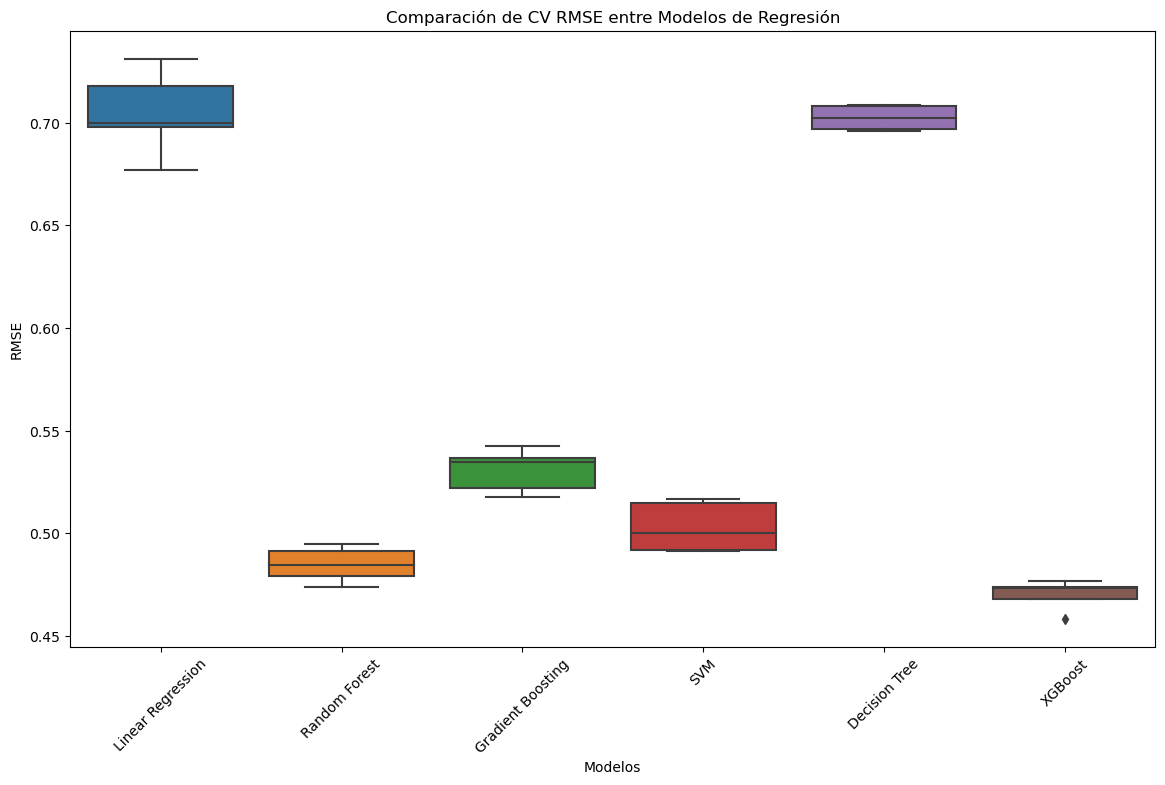

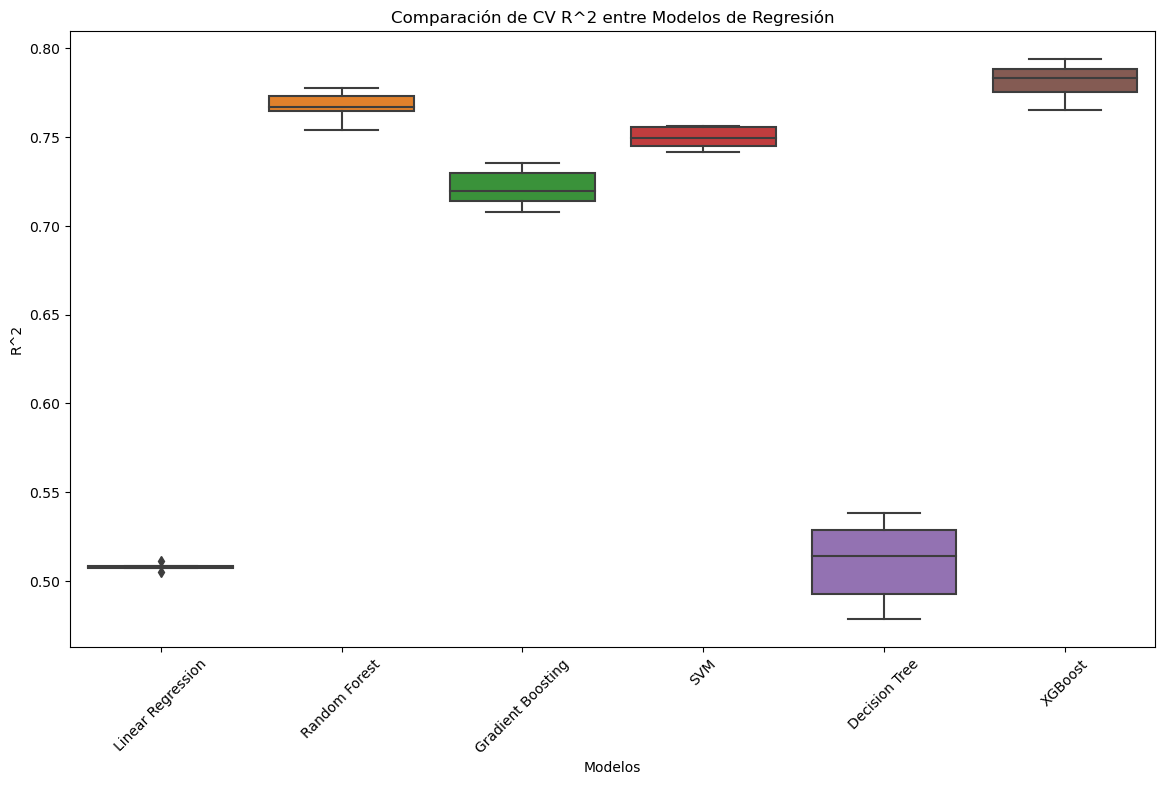

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

# Lista de modelos de regresión
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVM', SVR()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('XGBoost', xgb.XGBRegressor(random_state=42))
]

# Diccionario para almacenar los resultados de validación cruzada
results_cv_rmse = {}
results_cv_r2 = {}

# Scorers para RMSE y R2
rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)

# Evaluar cada modelo utilizando validación cruzada
for name, model in models:
    # Calcular RMSE con validación cruzada
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_scorer)
    results_cv_rmse[name] = cv_scores_rmse
    
    # Calcular R^2 con validación cruzada
    cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring=r2_scorer)
    results_cv_r2[name] = cv_scores_r2
    
    print(f"{name}: Mean CV RMSE = {np.mean(cv_scores_rmse):.2f}, Std CV RMSE = {np.std(cv_scores_rmse):.2f}")
    print(f"{name}: Mean CV R^2 = {np.mean(cv_scores_r2):.2f}, Std CV R^2 = {np.std(cv_scores_r2):.2f}")

# Convertir los resultados en DataFrames para facilitar la visualización
results_cv_rmse_df = pd.DataFrame(results_cv_rmse)
results_cv_r2_df = pd.DataFrame(results_cv_r2)

# Crear el boxplot para RMSE de validación cruzada
plt.figure(figsize=(14, 8))
sns.boxplot(data=results_cv_rmse_df)
plt.title('Comparación de CV RMSE entre Modelos de Regresión')
plt.ylabel('RMSE')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

# Crear el boxplot para R^2 de validación cruzada
plt.figure(figsize=(14, 8))
sns.boxplot(data=results_cv_r2_df)
plt.title('Comparación de CV R^2 entre Modelos de Regresión')
plt.ylabel('R^2')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

#### 6.2.3 Entrenamiento eliminando las fechas del COVID y eliminando outliers en la variable intensidad. IMPUTANDO VARIABLES

Linear Regression: Mean CV RMSE = 0.71, Std CV RMSE = 0.01
Linear Regression: Mean CV R^2 = 0.50, Std CV R^2 = 0.01
Random Forest: Mean CV RMSE = 0.52, Std CV RMSE = 0.01
Random Forest: Mean CV R^2 = 0.73, Std CV R^2 = 0.01
Gradient Boosting: Mean CV RMSE = 0.56, Std CV RMSE = 0.01
Gradient Boosting: Mean CV R^2 = 0.68, Std CV R^2 = 0.01
SVM: Mean CV RMSE = 0.53, Std CV RMSE = 0.01
SVM: Mean CV R^2 = 0.72, Std CV R^2 = 0.01
Decision Tree: Mean CV RMSE = 0.76, Std CV RMSE = 0.01
Decision Tree: Mean CV R^2 = 0.43, Std CV R^2 = 0.02
XGBoost: Mean CV RMSE = 0.50, Std CV RMSE = 0.01
XGBoost: Mean CV R^2 = 0.75, Std CV R^2 = 0.01


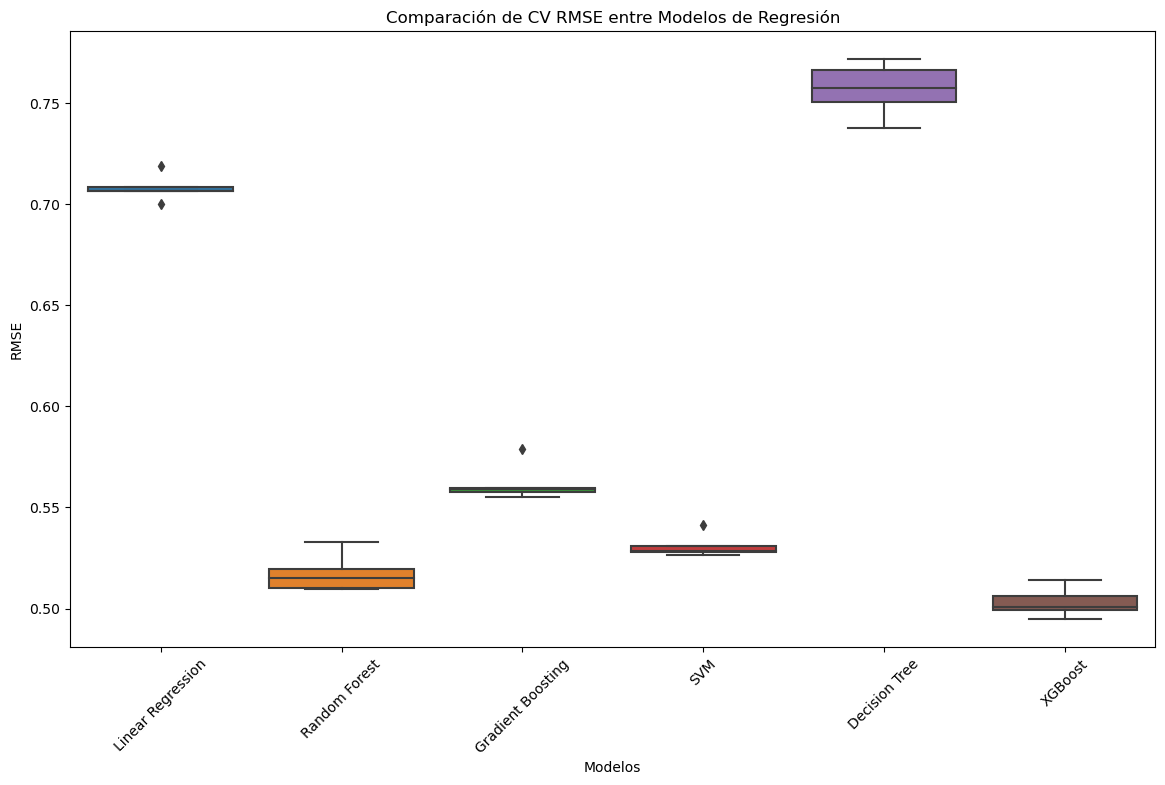

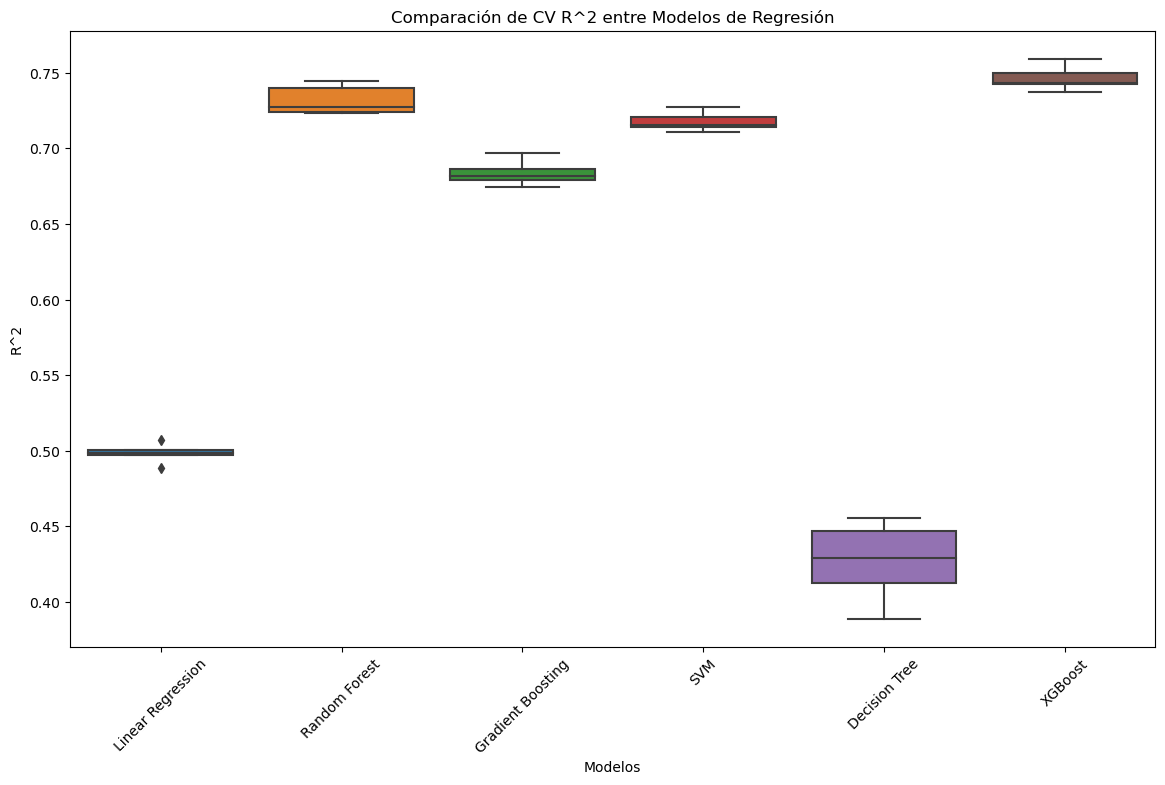

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

# Lista de modelos de regresión
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVM', SVR()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('XGBoost', xgb.XGBRegressor(random_state=42))
]

# Diccionario para almacenar los resultados de validación cruzada
results_cv_rmse = {}
results_cv_r2 = {}

# Scorers para RMSE y R2
rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)

# Evaluar cada modelo utilizando validación cruzada
for name, model in models:
    # Calcular RMSE con validación cruzada
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_scorer)
    results_cv_rmse[name] = cv_scores_rmse
    
    # Calcular R^2 con validación cruzada
    cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring=r2_scorer)
    results_cv_r2[name] = cv_scores_r2
    
    print(f"{name}: Mean CV RMSE = {np.mean(cv_scores_rmse):.2f}, Std CV RMSE = {np.std(cv_scores_rmse):.2f}")
    print(f"{name}: Mean CV R^2 = {np.mean(cv_scores_r2):.2f}, Std CV R^2 = {np.std(cv_scores_r2):.2f}")

# Convertir los resultados en DataFrames para facilitar la visualización
results_cv_rmse_df = pd.DataFrame(results_cv_rmse)
results_cv_r2_df = pd.DataFrame(results_cv_r2)

# Crear el boxplot para RMSE de validación cruzada
plt.figure(figsize=(14, 8))
sns.boxplot(data=results_cv_rmse_df)
plt.title('Comparación de CV RMSE entre Modelos de Regresión')
plt.ylabel('RMSE')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

# Crear el boxplot para R^2 de validación cruzada
plt.figure(figsize=(14, 8))
sns.boxplot(data=results_cv_r2_df)
plt.title('Comparación de CV R^2 entre Modelos de Regresión')
plt.ylabel('R^2')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

#### 6.2.4 Eliminando datos del covid, sin outliers de intensidad y metiendo la hora del día como variable adicional. IMPUTANDO VARIABLES

Linear Regression: Mean CV RMSE = 0.71, Std CV RMSE = 0.01
Linear Regression: Mean CV R^2 = 0.50, Std CV R^2 = 0.01
Random Forest: Mean CV RMSE = 0.50, Std CV RMSE = 0.01
Random Forest: Mean CV R^2 = 0.75, Std CV R^2 = 0.01
Gradient Boosting: Mean CV RMSE = 0.55, Std CV RMSE = 0.01
Gradient Boosting: Mean CV R^2 = 0.70, Std CV R^2 = 0.01
SVM: Mean CV RMSE = 0.52, Std CV RMSE = 0.01
SVM: Mean CV R^2 = 0.73, Std CV R^2 = 0.00
Decision Tree: Mean CV RMSE = 0.72, Std CV RMSE = 0.01
Decision Tree: Mean CV R^2 = 0.48, Std CV R^2 = 0.02
XGBoost: Mean CV RMSE = 0.48, Std CV RMSE = 0.01
XGBoost: Mean CV R^2 = 0.77, Std CV R^2 = 0.01


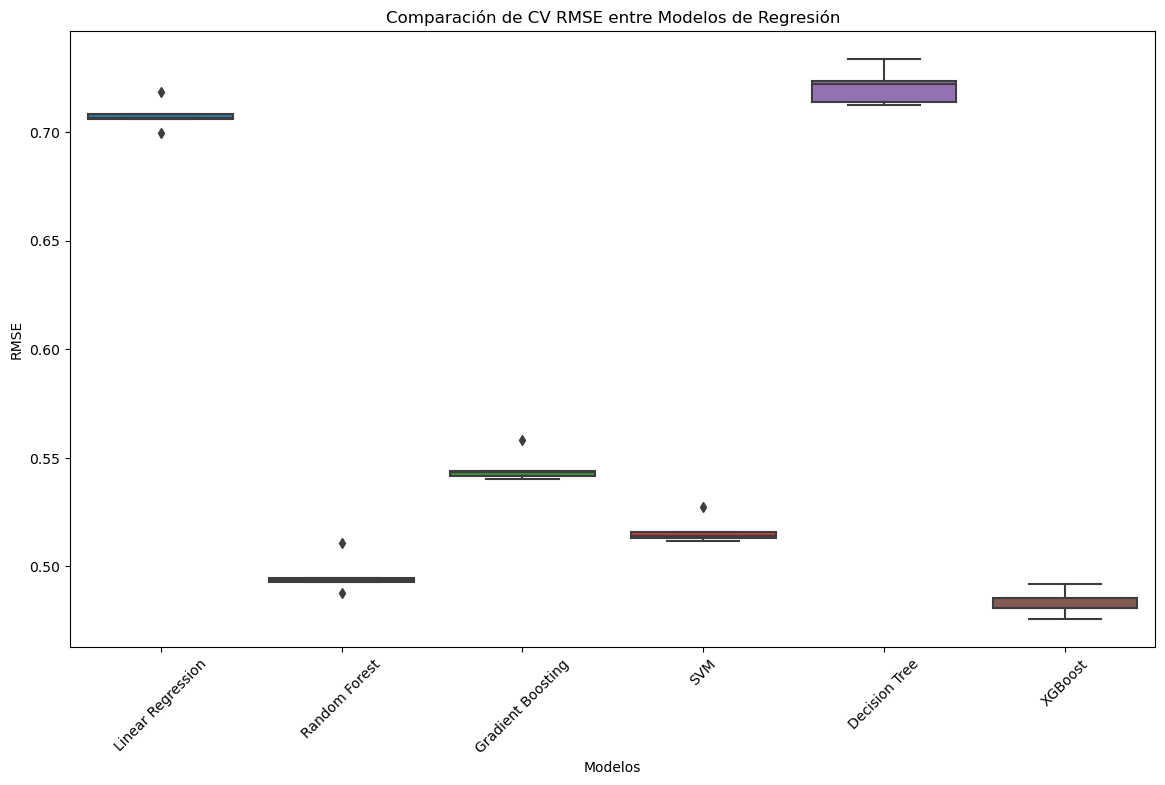

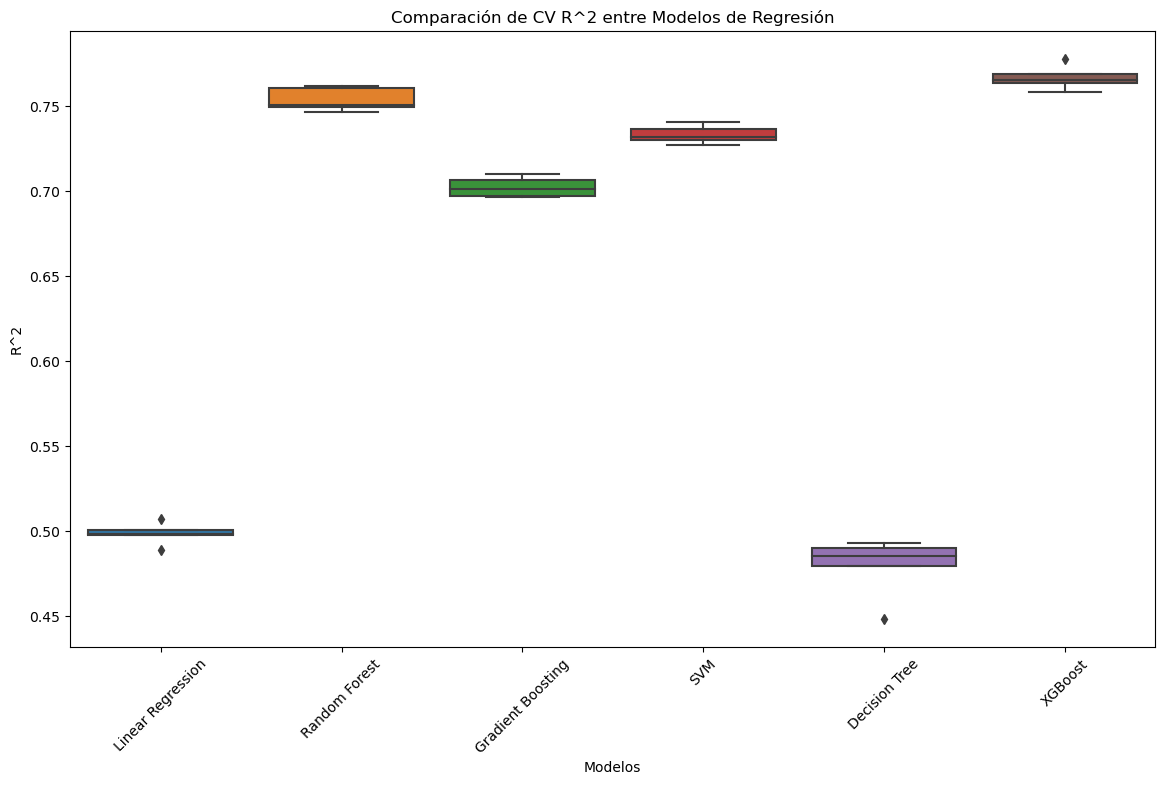

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

# Lista de modelos de regresión
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVM', SVR()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('XGBoost', xgb.XGBRegressor(random_state=42))
]

# Diccionario para almacenar los resultados de validación cruzada
results_cv_rmse = {}
results_cv_r2 = {}

# Scorers para RMSE y R2
rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)

# Evaluar cada modelo utilizando validación cruzada
for name, model in models:
    # Calcular RMSE con validación cruzada
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_scorer)
    results_cv_rmse[name] = cv_scores_rmse
    
    # Calcular R^2 con validación cruzada
    cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring=r2_scorer)
    results_cv_r2[name] = cv_scores_r2
    
    print(f"{name}: Mean CV RMSE = {np.mean(cv_scores_rmse):.2f}, Std CV RMSE = {np.std(cv_scores_rmse):.2f}")
    print(f"{name}: Mean CV R^2 = {np.mean(cv_scores_r2):.2f}, Std CV R^2 = {np.std(cv_scores_r2):.2f}")

# Convertir los resultados en DataFrames para facilitar la visualización
results_cv_rmse_df = pd.DataFrame(results_cv_rmse)
results_cv_r2_df = pd.DataFrame(results_cv_r2)

# Crear el boxplot para RMSE de validación cruzada
plt.figure(figsize=(14, 8))
sns.boxplot(data=results_cv_rmse_df)
plt.title('Comparación de CV RMSE entre Modelos de Regresión')
plt.ylabel('RMSE')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

# Crear el boxplot para R^2 de validación cruzada
plt.figure(figsize=(14, 8))
sns.boxplot(data=results_cv_r2_df)
plt.title('Comparación de CV R^2 entre Modelos de Regresión')
plt.ylabel('R^2')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

#### 6.2.5 Eliminando datos del covid, sin outliers de intensidad y metiendo la hora del día como variable adicional. SIN IMPUTAR VARIABLES

Linear Regression: Mean CV RMSE = 0.71, Std CV RMSE = 0.02
Linear Regression: Mean CV R^2 = 0.50, Std CV R^2 = 0.01
Random Forest: Mean CV RMSE = 0.49, Std CV RMSE = 0.02
Random Forest: Mean CV R^2 = 0.76, Std CV R^2 = 0.01
Gradient Boosting: Mean CV RMSE = 0.53, Std CV RMSE = 0.02
Gradient Boosting: Mean CV R^2 = 0.72, Std CV R^2 = 0.01
SVM: Mean CV RMSE = 0.51, Std CV RMSE = 0.02
SVM: Mean CV R^2 = 0.74, Std CV R^2 = 0.00
Decision Tree: Mean CV RMSE = 0.71, Std CV RMSE = 0.02
Decision Tree: Mean CV R^2 = 0.50, Std CV R^2 = 0.03
XGBoost: Mean CV RMSE = 0.47, Std CV RMSE = 0.01
XGBoost: Mean CV R^2 = 0.77, Std CV R^2 = 0.01


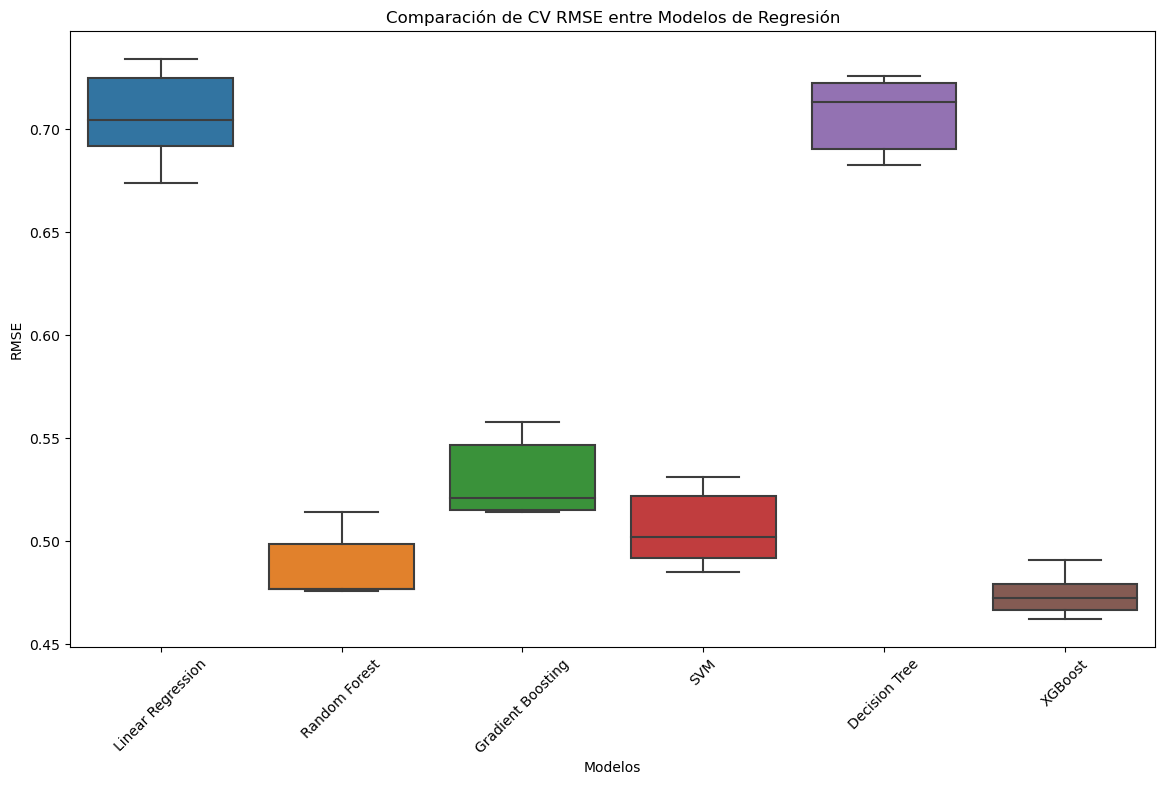

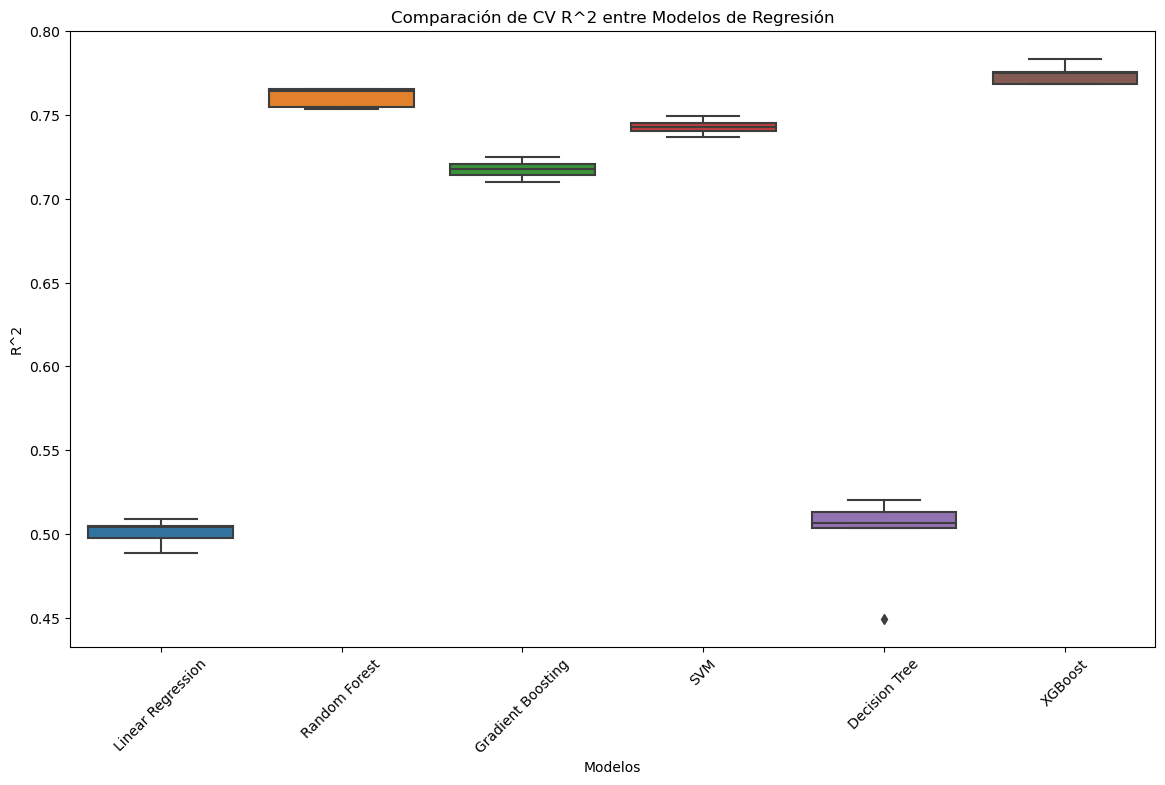

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

# Lista de modelos de regresión
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('SVM', SVR()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('XGBoost', xgb.XGBRegressor(random_state=42))
]

# Diccionario para almacenar los resultados de validación cruzada
results_cv_rmse = {}
results_cv_r2 = {}

# Scorers para RMSE y R2
rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)

# Evaluar cada modelo utilizando validación cruzada
for name, model in models:
    # Calcular RMSE con validación cruzada
    cv_scores_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring=rmse_scorer)
    results_cv_rmse[name] = cv_scores_rmse
    
    # Calcular R^2 con validación cruzada
    cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring=r2_scorer)
    results_cv_r2[name] = cv_scores_r2
    
    print(f"{name}: Mean CV RMSE = {np.mean(cv_scores_rmse):.2f}, Std CV RMSE = {np.std(cv_scores_rmse):.2f}")
    print(f"{name}: Mean CV R^2 = {np.mean(cv_scores_r2):.2f}, Std CV R^2 = {np.std(cv_scores_r2):.2f}")

# Convertir los resultados en DataFrames para facilitar la visualización
results_cv_rmse_df = pd.DataFrame(results_cv_rmse)
results_cv_r2_df = pd.DataFrame(results_cv_r2)

# Crear el boxplot para RMSE de validación cruzada
plt.figure(figsize=(14, 8))
sns.boxplot(data=results_cv_rmse_df)
plt.title('Comparación de CV RMSE entre Modelos de Regresión')
plt.ylabel('RMSE')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

# Crear el boxplot para R^2 de validación cruzada
plt.figure(figsize=(14, 8))
sns.boxplot(data=results_cv_r2_df)
plt.title('Comparación de CV R^2 entre Modelos de Regresión')
plt.ylabel('R^2')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

### 6.3 Grid Search XGBoost

In [349]:
from sklearn.model_selection import GridSearchCV, train_test_split

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [350]:
# Inicializar el modelo de XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar el GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros encontrados: ", best_params)
print("Mejor puntuación R^2 en validación cruzada: ", best_score)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mejores parámetros encontrados:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}
Mejor puntuación R^2 en validación cruzada:  0.7960797616269923


Mejores parámetros encontrados:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}

In [394]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import xgboost as xgb
import time


# Definir el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Inicializar el modelo de XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Realizar la búsqueda de hiperparámetros utilizando RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='r2', n_jobs=-1, random_state=42, verbose=2)

# Medir el tiempo de inicio
start_time = time.time()

# Ejecutar el RandomizedSearchCV
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Mejores parámetros encontrados: ", best_params)
print("Mejor puntuación R^2 en validación cruzada: ", best_score)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros encontrados:  {'colsample_bytree': 0.8108963368184213, 'learning_rate': 0.05843198765548518, 'max_depth': 8, 'n_estimators': 379, 'subsample': 0.8410901903338115}
Mejor puntuación R^2 en validación cruzada:  0.7967240111408159


Fecha           datetime64[ns]
NO2 Real               float64
NO2 Predicho           float32
dtype: object


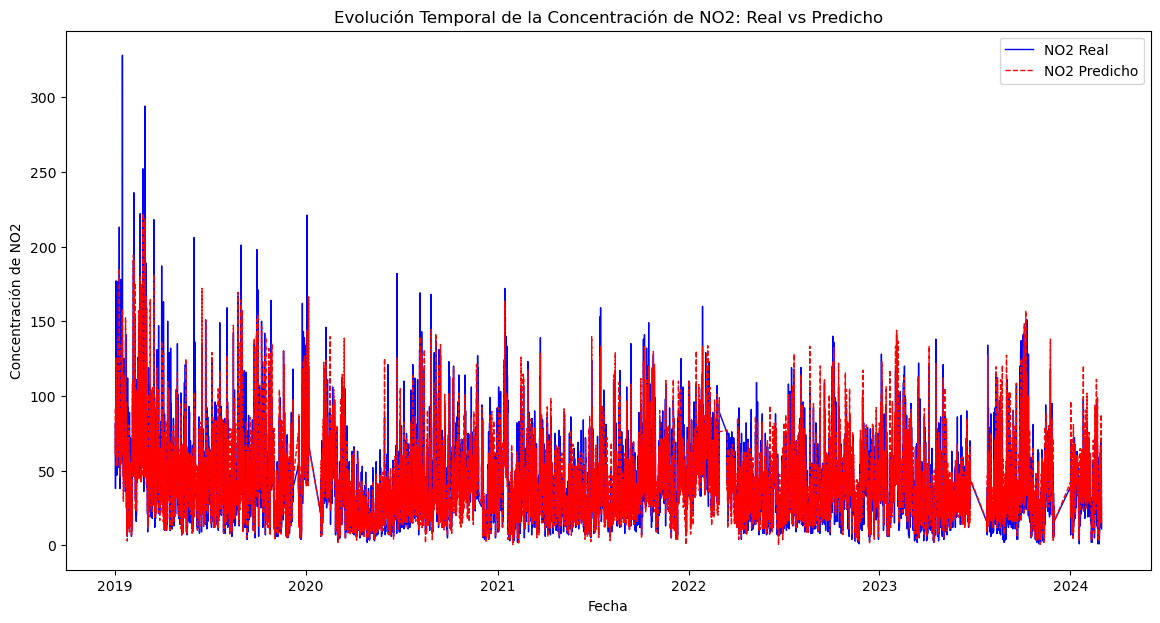

In [450]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Obtener las predicciones del modelo entrenado
y_pred = random_search.predict(X_test)


# Asegurarse de que y_test sea un numpy array
if not isinstance(y_test, np.ndarray):
    y_test = y_test.to_numpy()

# Asegurarse de que y_test y y_pred sean arrays 2D para la transformación inversa
y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

# Transformar los datos de vuelta a su escala original
y_test_transformed = scaler_y.inverse_transform(y_test_reshaped)
y_pred_transformed = scaler_y.inverse_transform(y_pred_reshaped)

# Asegurarse de que los arrays transformados sean 1D
y_test_transformed = y_test_transformed.flatten()
y_pred_transformed = y_pred_transformed.flatten()

# Crear un DataFrame con los valores reales y predichos
results_df = pd.DataFrame({
    'Fecha': X_test.index,  # Asegúrate de que el índice de X_test sea la fecha
    'NO2 Real': y_test_transformed,
    'NO2 Predicho': y_pred_transformed
})

# Verificar los tipos de datos en el DataFrame
print(results_df.dtypes)

# Ordenar el DataFrame por fecha
results_df = results_df.sort_values('Fecha')

# Crear el gráfico
plt.figure(figsize=(14, 7))
plt.plot(results_df['Fecha'], results_df['NO2 Real'], label='NO2 Real', color='blue', linewidth=1)
plt.plot(results_df['Fecha'], results_df['NO2 Predicho'], label='NO2 Predicho', color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Fecha')
plt.ylabel('Concentración de NO2')
plt.title('Evolución Temporal de la Concentración de NO2: Real vs Predicho')
plt.legend()
plt.show()

### 7. Guardar el mejor modelo y los transformadores

In [505]:
import pickle

# Guardar el modelo entrenado
with open(r'C:\Users\ezxt99454\Desktop\predicciones_polucion\modelos\xgboost_NO2.pkl', 'wb') as file:
    pickle.dump(random_search, file)

# Guardar el scaler de las características
with open(r'C:\Users\ezxt99454\Desktop\predicciones_polucion\modelos\scaler_X.pkl', 'wb') as file:
    pickle.dump(scaler_X, file)

# Guardar el scaler de la variable objetivo
with open(r'C:\Users\ezxt99454\Desktop\predicciones_polucion\modelos\scaler_y.pkl', 'wb') as file:
    pickle.dump(scaler_y, file)

# Guardar el OneHotEncoder
with open(r'C:\Users\ezxt99454\Desktop\predicciones_polucion\modelos\encoder.pkl', 'wb') as file:
    pickle.dump(encoder, file)

['C:\\Users\\ezxt99454\\Desktop\\crisa\\Personal\\SaturdaysAI\\clases\\proyecto_final\\modelos\\xgboost_NO2_predictor.pkl']

### 8. Despliegue del modelo y predicciones sobre nuevos datos de entrada

#### 8.1 Cargar el modelo y transformadores

In [39]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import json

# Cargar los objetos guardados
with open(r'C:\Users\ezxt99454\Desktop\predicciones_polucion\modelos\xgboost_NO2.pkl', 'rb') as file:
    xboost_NO2 = pickle.load(file)

with open(r'C:\Users\ezxt99454\Desktop\predicciones_polucion\modelos\scaler_X.pkl', 'rb') as file:
    scaler_X = pickle.load(file)

with open(r'C:\Users\ezxt99454\Desktop\predicciones_polucion\modelos\scaler_y.pkl', 'rb') as file:
    scaler_y = pickle.load(file)

with open(r'C:\Users\ezxt99454\Desktop\predicciones_polucion\modelos\encoder.pkl', 'rb') as file:
    encoder = pickle.load(file)

#### 8.2 Generación de las variables adicionales

A partir del campo datetime de entrada vamos a generar las siguientes variables de entrada con las que fue entrenado el modelo:

- franja_horaria
- confinamiento
- estacion
- festivo
- fin_de_semana
- hora_del_dia

In [48]:
def get_franja_horaria(hour):
    if 0 <= hour < 7:
        return 'madrugada'
    elif 7 <= hour < 12:
        return 'mañana'
    elif 12 <= hour < 16:
        return 'medio_dia'
    elif 16 <= hour < 21:
        return 'tarde'
    elif 21 <= hour < 24:
        return 'noche'

def get_confinamiento_status(date):
    start_confinamiento_general = pd.Timestamp('2020-03-14')
    end_confinamiento_general = pd.Timestamp('2020-06-21')
    
    if start_confinamiento_general <= date <= end_confinamiento_general:
        return 'si'
    else:
        return 'no'

def get_estacion(month, day):
    if (month == 12 and day >= 21) or (month in [1, 2]) or (month == 3 and day < 21):
        return 'invierno'
    elif (month == 3 and day >= 21) or (month in [4, 5]) or (month == 6 and day < 21):
        return 'primavera'
    elif (month == 6 and day >= 21) or (month in [7, 8]) or (month == 9 and day < 21):
        return 'verano'
    elif (month == 9 and day >= 21) or (month in [10, 11]) or (month == 12 and day < 21):
        return 'otoño'

Generación variable festivo: debemos cargar el csv de festivos, guardar un df que pasaremos a diccionario. Posteriormente, buscaremos en dicho diccionario si la fecha para la predicción es festivo o no.

In [49]:
import pandas as pd

# Cargar el archivo XLS de festivos
festivos_df = pd.read_excel(r'C:\Users\ezxt99454\Desktop\crisa\Personal\SaturdaysAI\clases\proyecto_final\data\festividades\calendario.xls')

# Asegurarse de que la columna 'Dia' sea de tipo datetime
festivos_df['Dia'] = pd.to_datetime(festivos_df['Dia'], dayfirst=True)

# Crear un diccionario para facilitar la búsqueda de festivos
festivos_dict = festivos_df.set_index('Dia')['laborable / festivo / domingo festivo'].to_dict()

In [50]:
def get_festivo_status(date, festivos_dict):
    if date in festivos_dict:
        return 'si' if festivos_dict[date] == 'festivo' else 'no'
    else:
        return 'no'

#### 8.3 Procesado de los datos de entrada

In [51]:
def preprocess_input_data(json_data, scaler_X, encoder, festivos_dict):
    
    # Crear DataFrame a partir del JSON
    df = pd.DataFrame([json_data])
    
    # Convertir la columna datetime a un objeto datetime
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    # Crear nuevas columnas a partir del datetime
    df['franja_horaria'] = df['datetime'].apply(lambda x: get_franja_horaria(x.hour))
    df['confinamiento'] = df['datetime'].apply(lambda x: get_confinamiento_status(x))
    df['estacion'] = df['datetime'].apply(lambda x: get_estacion(x.month, x.day))
    df['festivo'] = df['datetime'].apply(lambda x: get_festivo_status(x, festivos_dict))
    df['fin_de_semana'] = df['datetime'].apply(lambda x: 'si' if x.weekday() >= 5 else 'no')
    df['hora_del_dia'] = df['datetime'].apply(lambda x: x.hour)

    # Eliminar la columna datetime
    df = df.drop(columns=['datetime'])
    
    # Asegurarse de que las columnas estén en el mismo orden y formato que se usaron durante el ajuste
    column_order = ['vel_viento', 'dir_viento', 'temperatura', 'humedad_relativa', 
                    'presion_barometrica', 'precipitacion', 'intensidad', 'franja_horaria', 
                    'estacion', 'confinamiento', 'festivo', 'fin_de_semana', 'hora_del_dia']
    
    df = df[column_order]
    
    # Identificar columnas numéricas y categóricas
    numerical_cols = df.select_dtypes(include=['float64', 'int32', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Estandarizar las columnas numéricas
    df[numerical_cols] = scaler_X.transform(df[numerical_cols])
    
    # Codificar las columnas categóricas
    encoded_cols = encoder.transform(df[categorical_cols])
    
    # Convertir el resultado a un DataFrame
    encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols), index=df.index)
    
    # Combinar el DataFrame original con el DataFrame codificado, excluyendo las columnas categóricas originales
    df_final = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
    
    return df_final

#### 8.4 Predicción

Ejemplo de datos de entrada:

In [52]:
json_data = {
    "datetime": "2019-01-01 00:00:00",
    "vel_viento": 0.68,
    "dir_viento": 48.0,
    "temperatura": 2.6,
    "humedad_relativa": 71.0,
    "presion_barometrica": 959.0,
    "precipitacion": 0.0,
    "intensidad": 135
}

Función para realizar la predicción:

In [53]:
def predict_no2(json_data, model, scaler_X, encoder, scaler_y, festivos_dict):
    
    # Preprocesar los datos de entrada
    df_processed = preprocess_input_data(json_data, scaler_X, encoder, festivos_dict)
    
    # Realizar la predicción
    y_pred_scaled = model.predict(df_processed)
    
    # Invertir la estandarización para obtener los valores reales
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    
    return y_pred[0][0]

Predicción de concentración de NO2 (ug/m3):

In [54]:
predicted_no2 = predict_no2(json_data, xboost_NO2, scaler_X, encoder, scaler_y, festivos_dict)
print(f"Predicted NO2 (ug/m3): {predicted_no2}")

Predicted NO2 (ug/m3): 72.94403076171875


In [10]:
df_final.head(1)

,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,NO2,intensidad,franja_horaria,estacion,confinamiento,festivo,fin_de_semana,hora_del_dia
datetime,,,,,,,,,,,,,,
2019-01-01,0.68,48.0,2.6,71.0,959.0,0.0,73.0,135,madrugada,invierno,no,si,no,0


### 8.5 Límites superior e inferior recomendado para los datos de entrada de las variables del modelo

In [12]:
# Seleccionar las columnas de interés
variables = ['vel_viento', 'dir_viento', 'temperatura', 'humedad_relativa',
             'presion_barometrica', 'precipitacion', 'intensidad']

# Calcular las estadísticas descriptivas
df_final[variables].describe()


,vel_viento,dir_viento,temperatura,humedad_relativa,presion_barometrica,precipitacion,intensidad
count,41492.0000000000,41492.0000000000,41492.0000000000,41492.0000000000,41492.0000000000,41492.0000000000,41492.0000000000
mean,1.1123462354,138.9643786754,16.6416032006,57.2422394678,947.2536874578,0.0481586812,340.1500048202
std,0.5544969955,84.0056426509,8.6442027997,21.9699731389,5.9034017908,0.4587663794,172.9261053488
min,0.0000000000,0.0000000000,-7.9000000000,8.0000000000,921.0000000000,0.0000000000,0.0000000000
25%,0.6600000000,67.0000000000,10.2000000000,39.0000000000,944.0000000000,0.0000000000,177.0000000000
50%,0.9900000000,113.0000000000,15.7000000000,56.0000000000,947.0000000000,0.0000000000,389.0000000000
75%,1.4100000000,217.0000000000,22.9000000000,75.0000000000,951.0000000000,0.0000000000,474.0000000000
max,5.0400000000,359.0000000000,42.0000000000,100.0000000000,967.0000000000,20.4000000000,747.0000000000


In [14]:
# Calcular los límites superiores e inferiores
limits = pd.DataFrame()
limits['mean'] = df_final[variables].mean()
limits['std'] = df_final[variables].std()
limits['upper_bound'] = limits['mean'] + 3 * limits['std']

# Mostrar los límites
print(limits[['upper_bound']])

                        upper_bound
vel_viento             2.7758372218
dir_viento           390.9813066282
temperatura           42.5742115996
humedad_relativa     123.1521588846
presion_barometrica  964.9638928302
precipitacion          1.4244578195
intensidad           858.9283208667
